<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/homeworks/h2/hw_02.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Max Rosado Vidal

* __Rol__: 201910503-5

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    return df_result

In [3]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [6]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [7]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [8]:
## FIX ME PLEASE
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

In [9]:
digits.memory_usage()

Index       128
c00       14376
c01       14376
c02       14376
c03       14376
          ...  
c60       14376
c61       14376
c62       14376
c63       14376
target    14376
Length: 66, dtype: int64

In [10]:
digits.memory_usage().sum()

934568

Se logra ver que la base de datos digits posee 65 columnas y 1797 filas. Los datos en cada una de estas columnas son numeros enteros y no hay datos nulos en estos. Además, en este DataFrame se usa 128 bytes en los indices y cada una de las columnas se usa 14376 bytes. Por lo tanto, en total usa 934568 bytes en esta base de datos.

Ahora veamos las distintas clases de elementos que hay en cada una de estas columnas y la distribucion de estos datos.

la columna c00 posee 1 diferentes valores enteros, los cuales son:
[0]


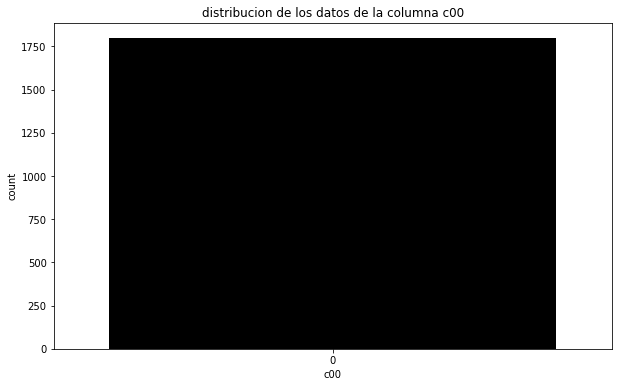

la columna c01 posee 9 diferentes valores enteros, los cuales son:
[0 1 2 3 4 5 6 7 8]


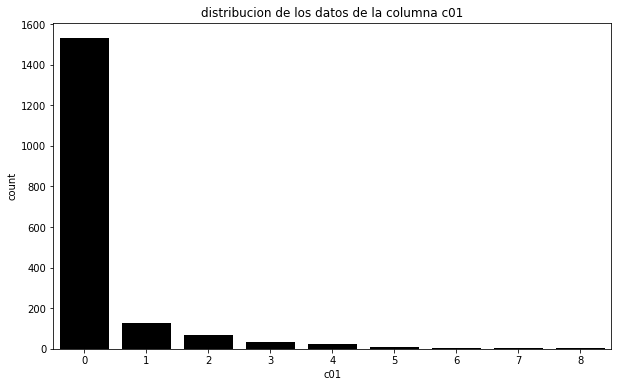

la columna c02 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


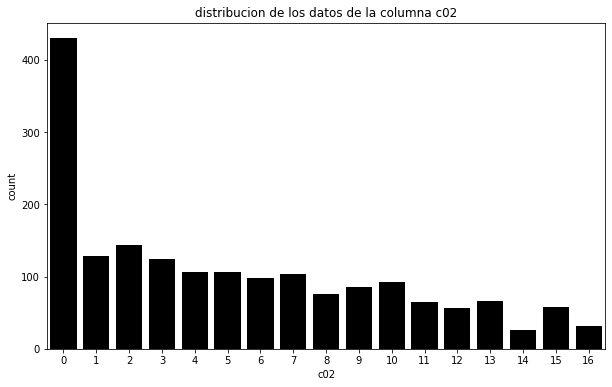

la columna c03 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


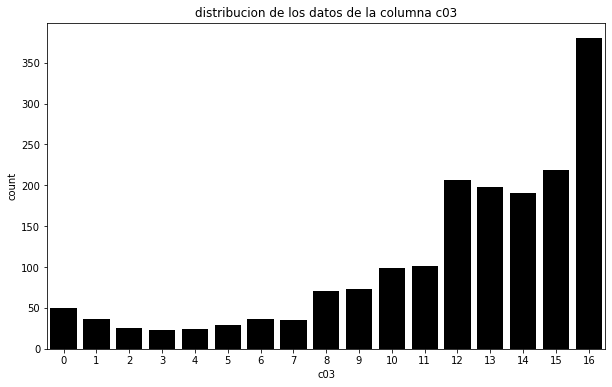

la columna c04 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


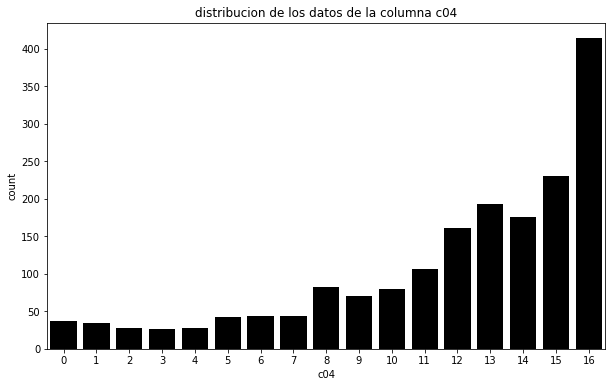

la columna c05 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


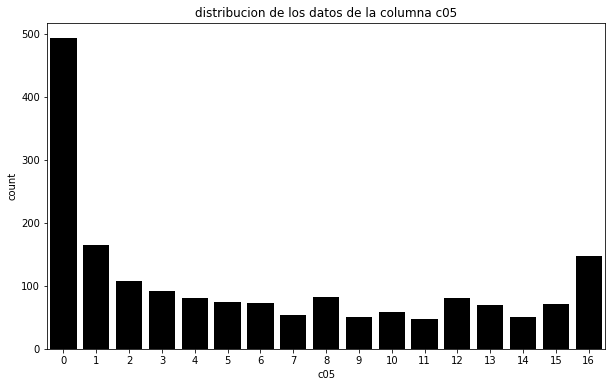

la columna c06 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


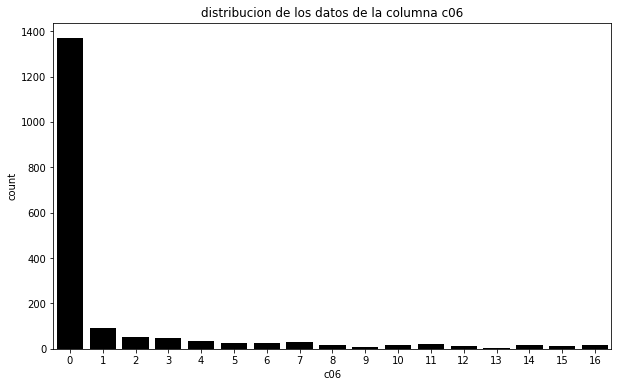

la columna c07 posee 16 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


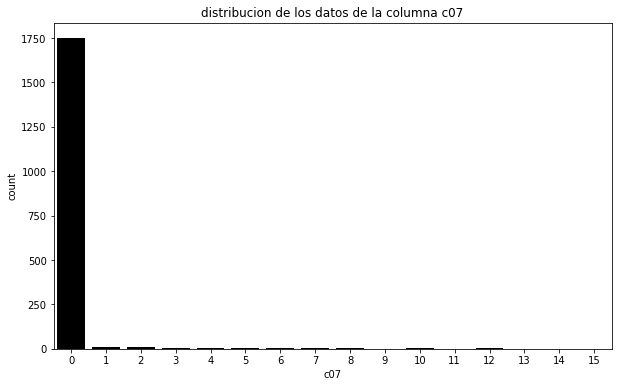

la columna c08 posee 3 diferentes valores enteros, los cuales son:
[0 1 2]


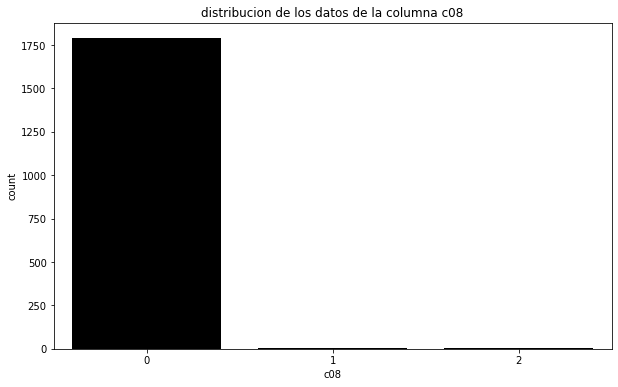

la columna c09 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


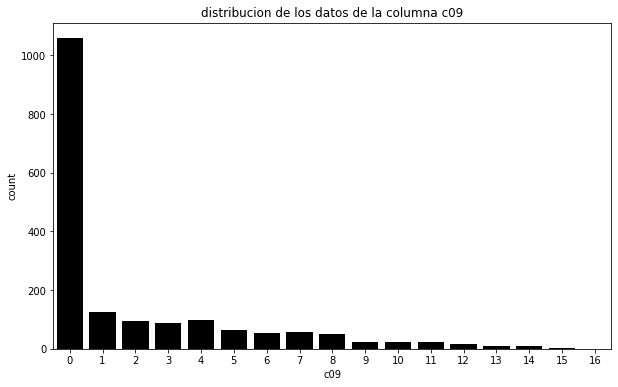

la columna c10 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


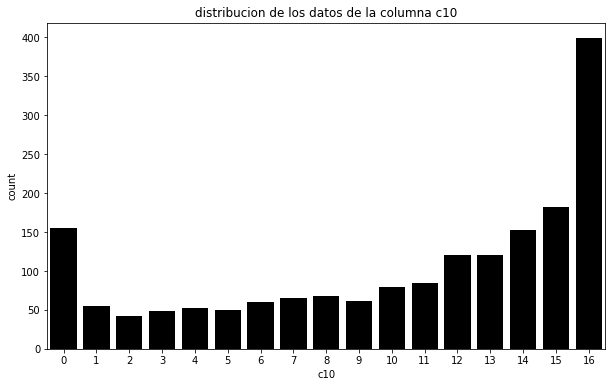

la columna c11 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


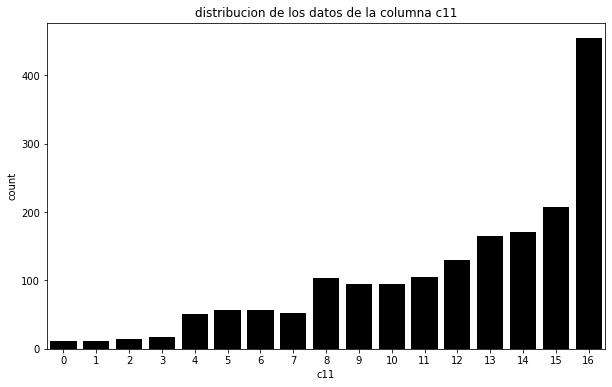

la columna c12 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


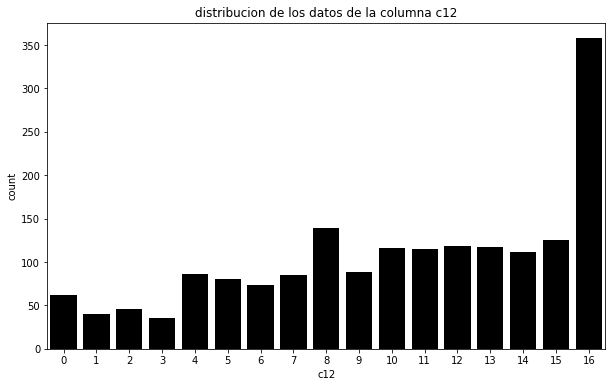

la columna c13 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


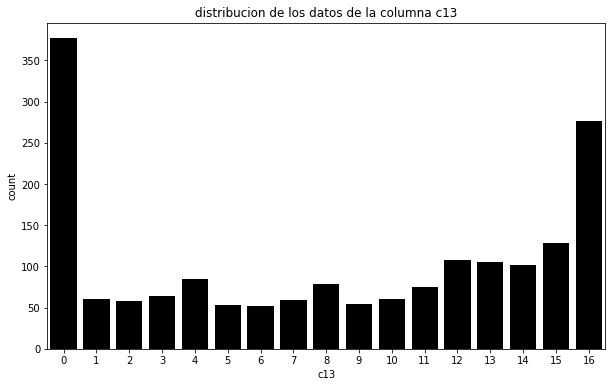

la columna c14 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


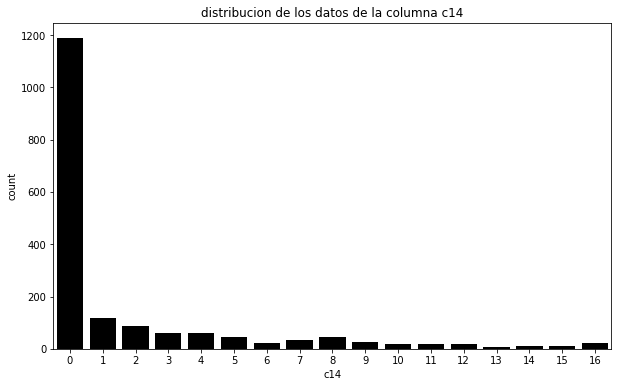

la columna c15 posee 13 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


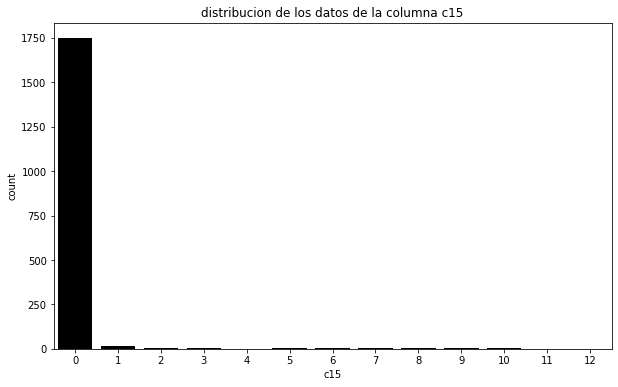

la columna c16 posee 3 diferentes valores enteros, los cuales son:
[0 1 2]


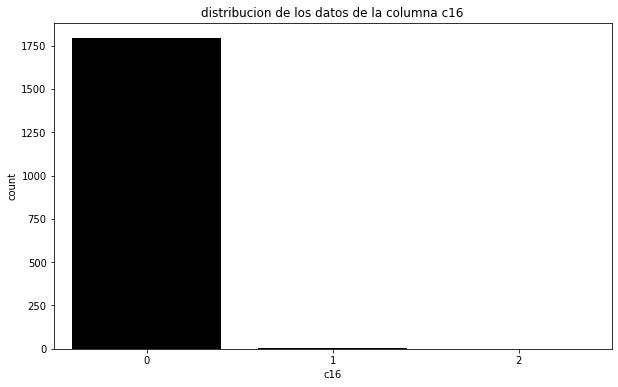

la columna c17 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


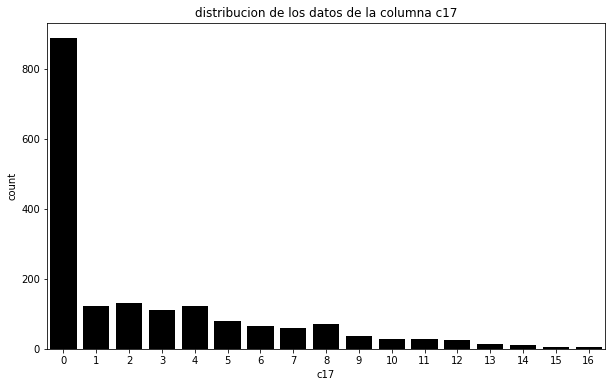

la columna c18 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


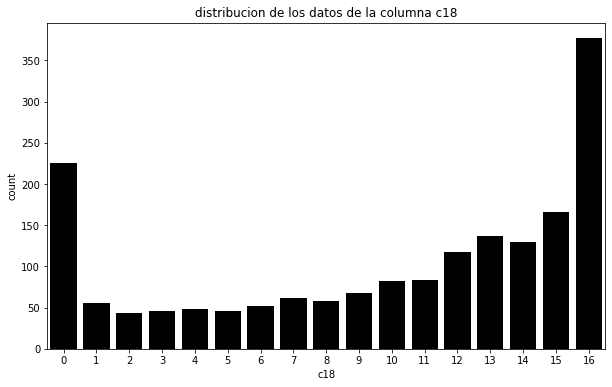

la columna c19 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


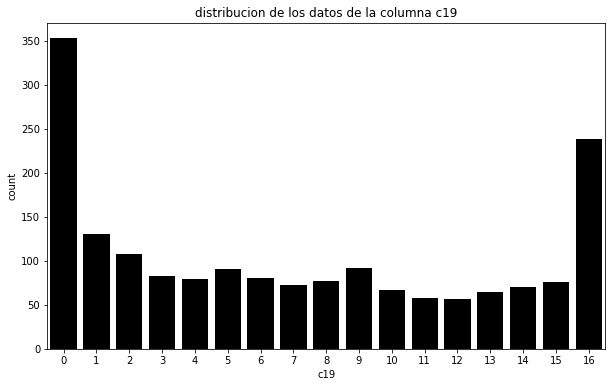

la columna c20 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


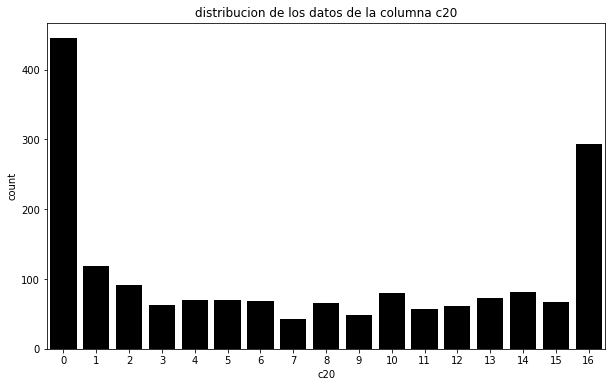

la columna c21 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


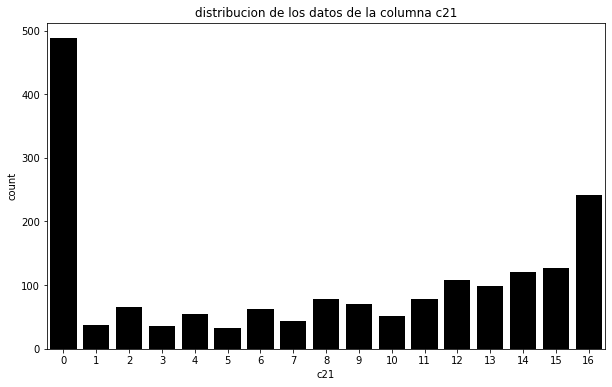

la columna c22 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


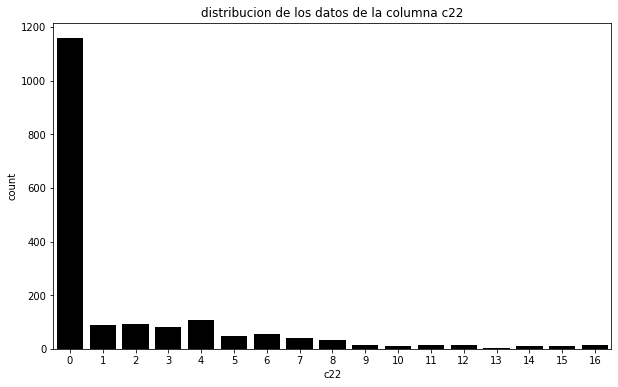

la columna c23 posee 8 diferentes valores enteros, los cuales son:
[0 1 2 3 4 5 6 8]


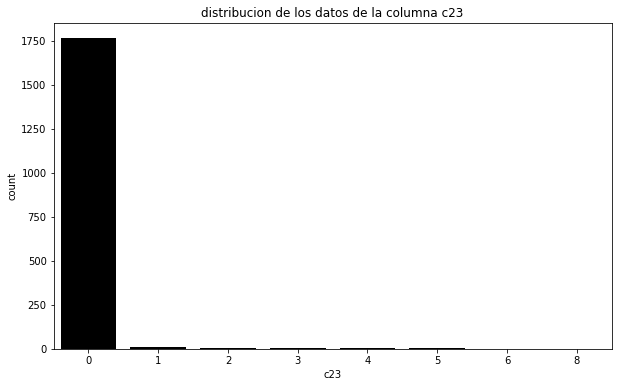

la columna c24 posee 2 diferentes valores enteros, los cuales son:
[0 1]


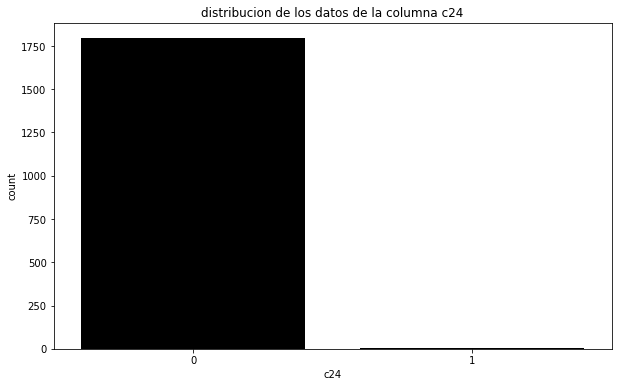

la columna c25 posee 16 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


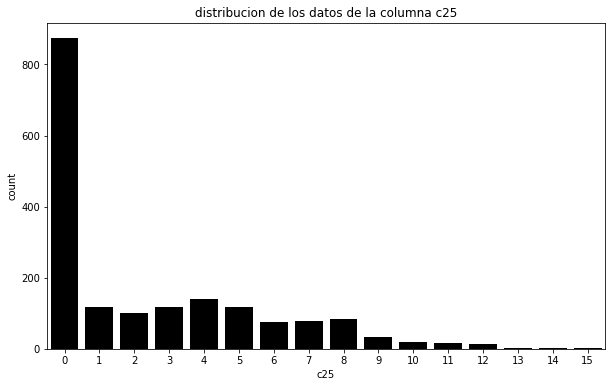

la columna c26 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


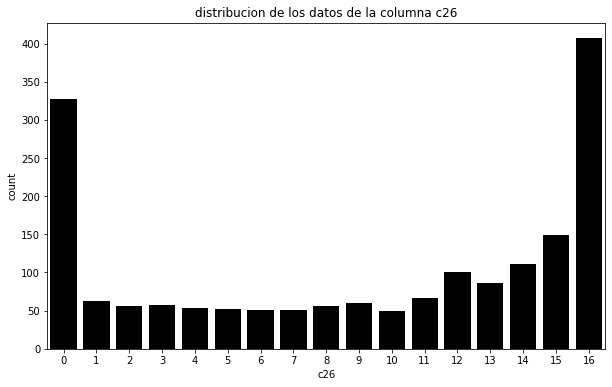

la columna c27 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


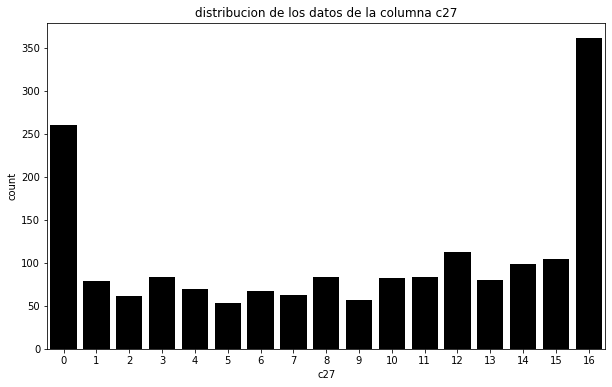

la columna c28 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


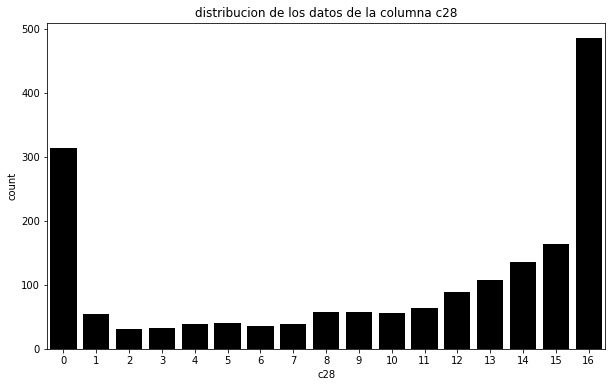

la columna c29 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


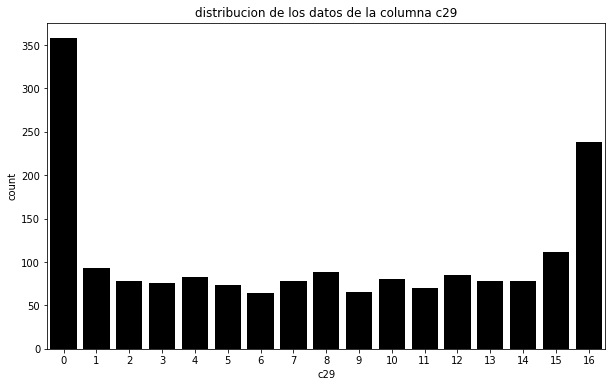

la columna c30 posee 16 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


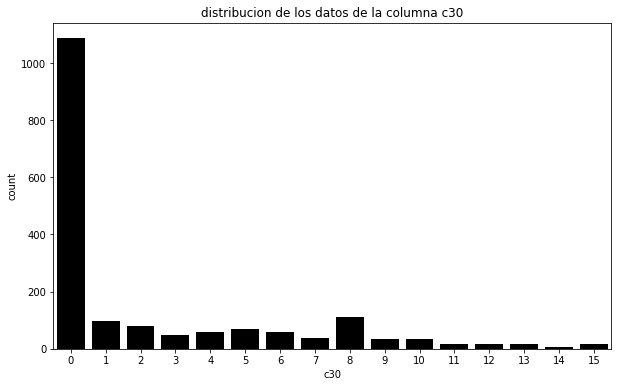

la columna c31 posee 2 diferentes valores enteros, los cuales son:
[0 1]


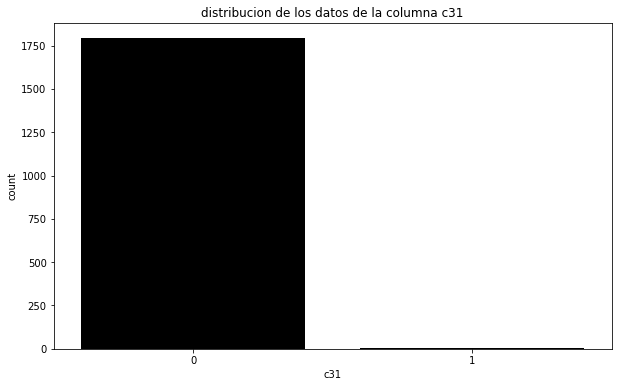

la columna c32 posee 1 diferentes valores enteros, los cuales son:
[0]


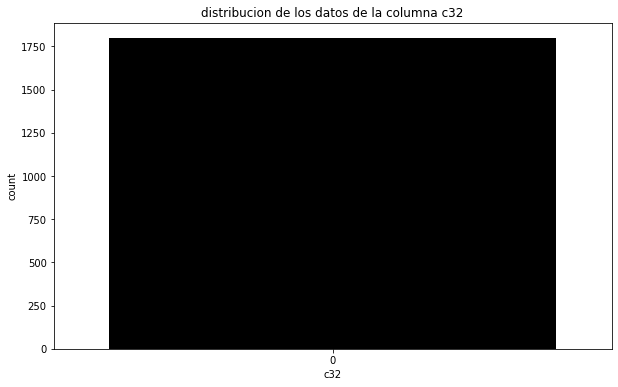

la columna c33 posee 15 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


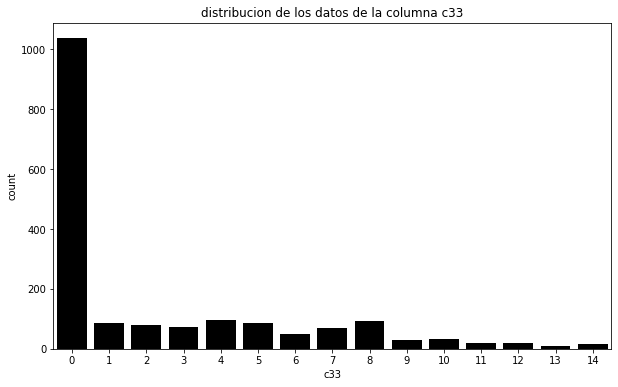

la columna c34 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


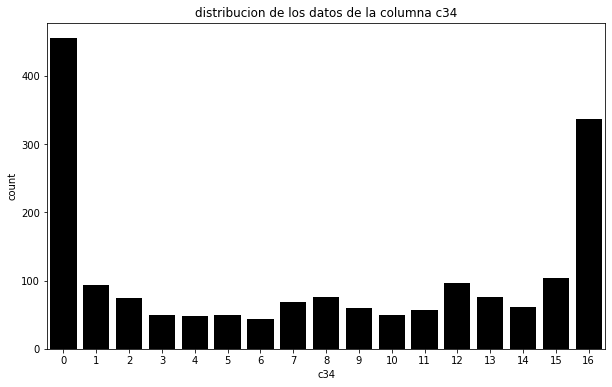

la columna c35 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


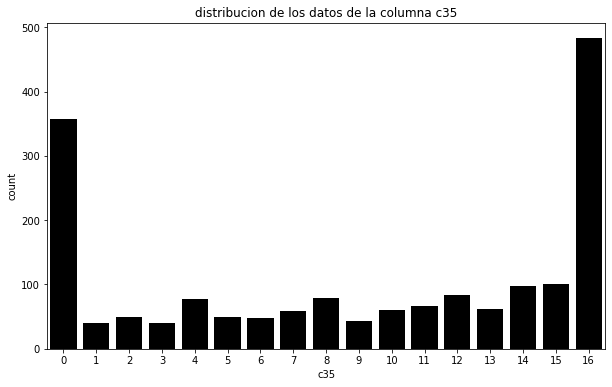

la columna c36 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


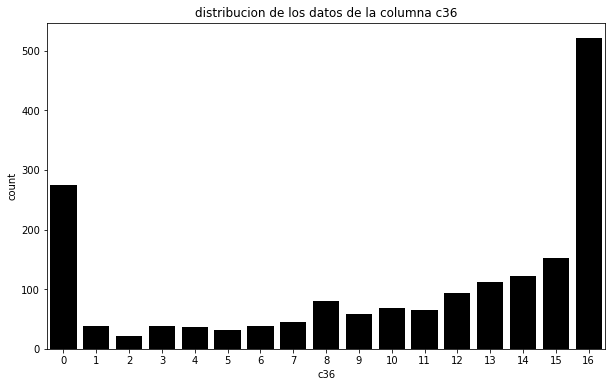

la columna c37 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


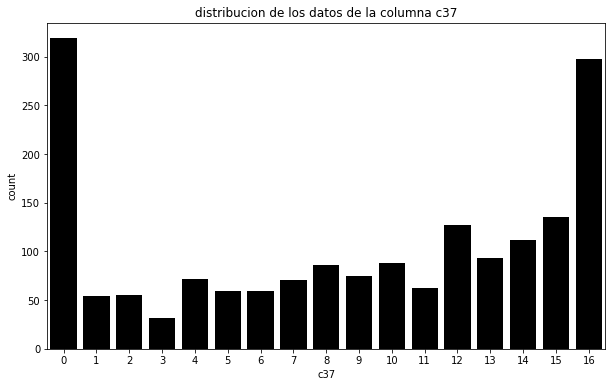

la columna c38 posee 15 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


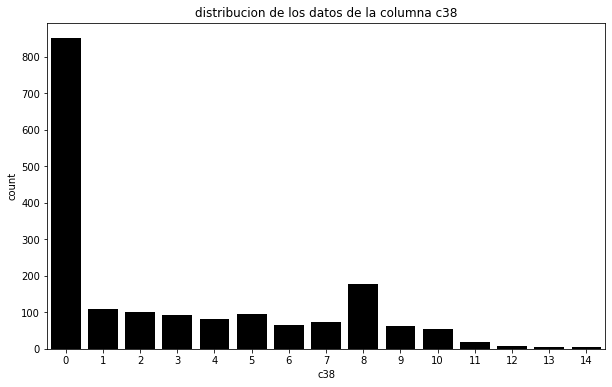

la columna c39 posee 1 diferentes valores enteros, los cuales son:
[0]


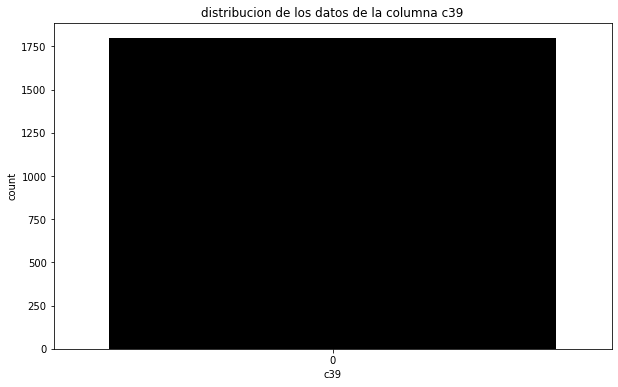

la columna c40 posee 5 diferentes valores enteros, los cuales son:
[0 1 2 3 4]


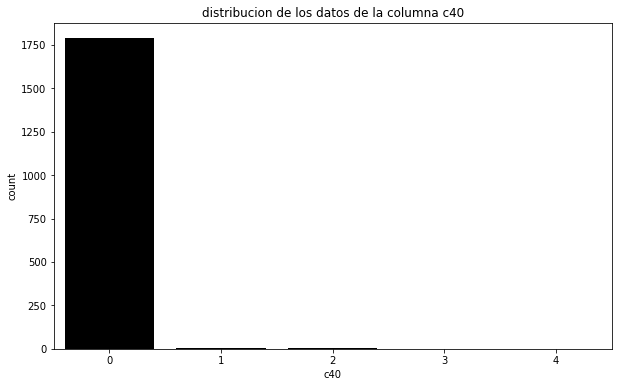

la columna c41 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


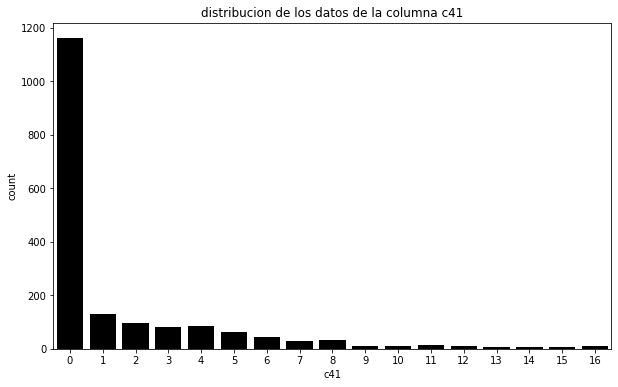

la columna c42 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


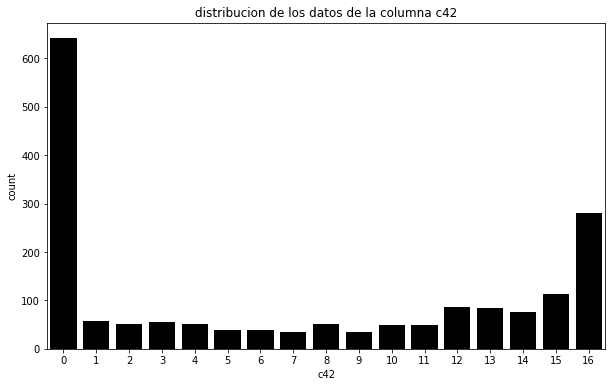

la columna c43 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


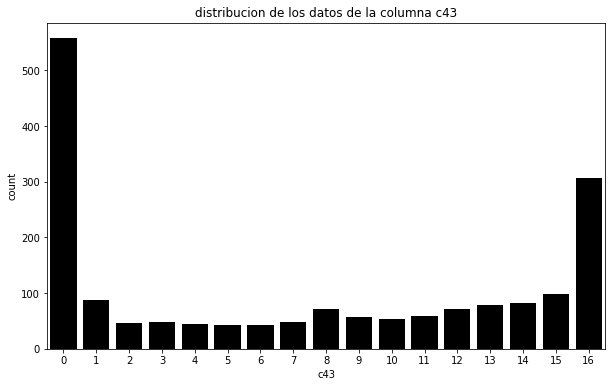

la columna c44 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


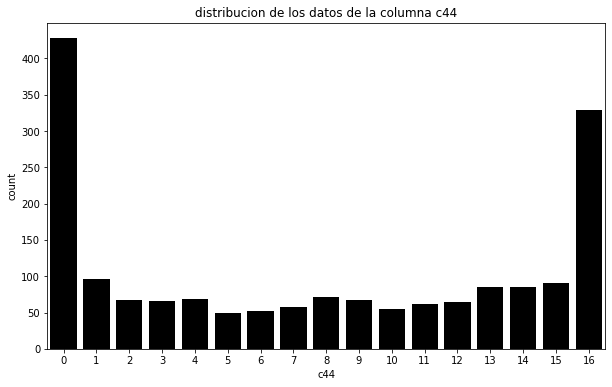

la columna c45 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


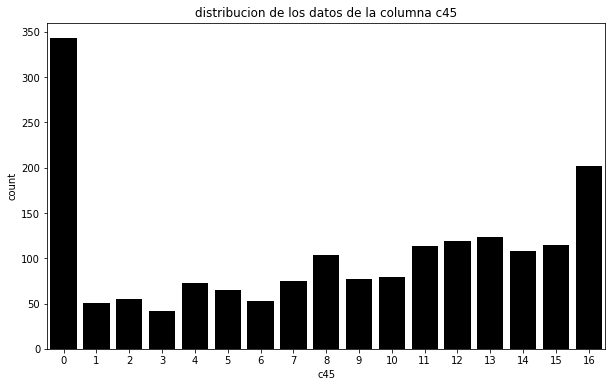

la columna c46 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


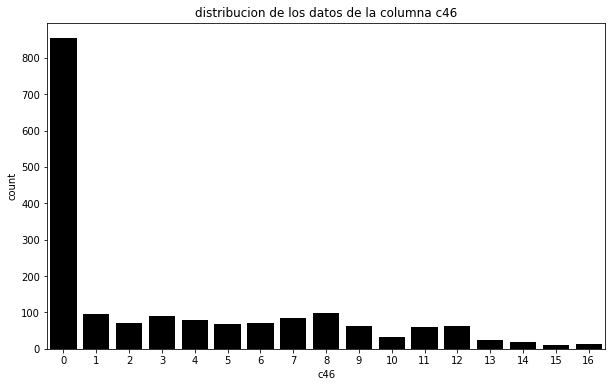

la columna c47 posee 7 diferentes valores enteros, los cuales son:
[0 1 2 3 4 5 6]


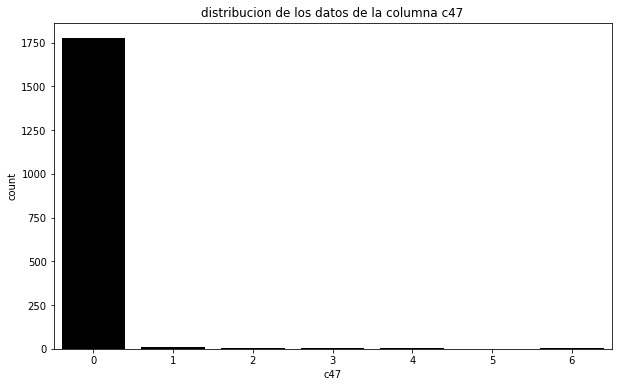

la columna c48 posee 4 diferentes valores enteros, los cuales son:
[0 1 3 8]


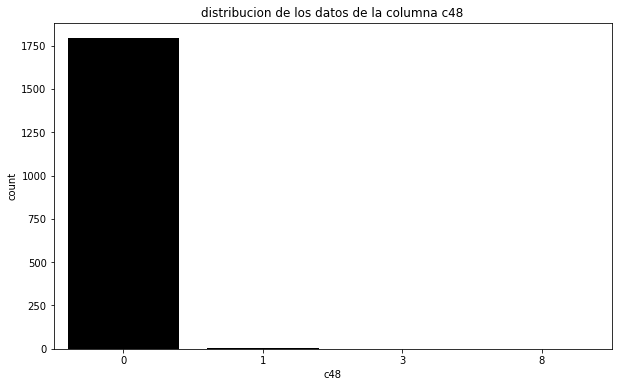

la columna c49 posee 15 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 15 16]


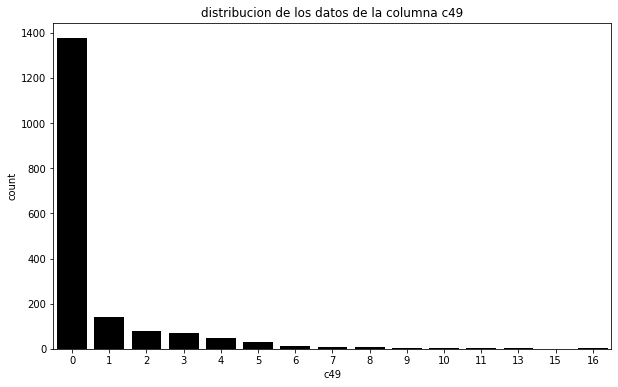

la columna c50 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


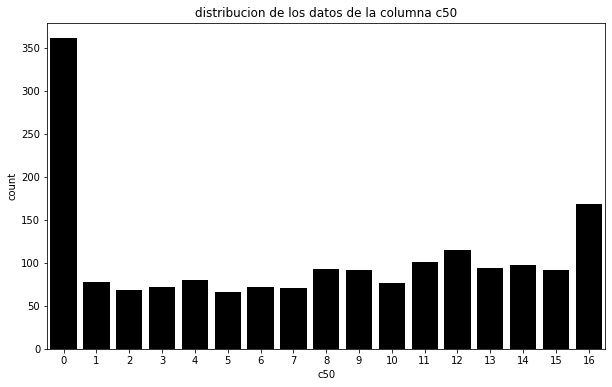

la columna c51 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


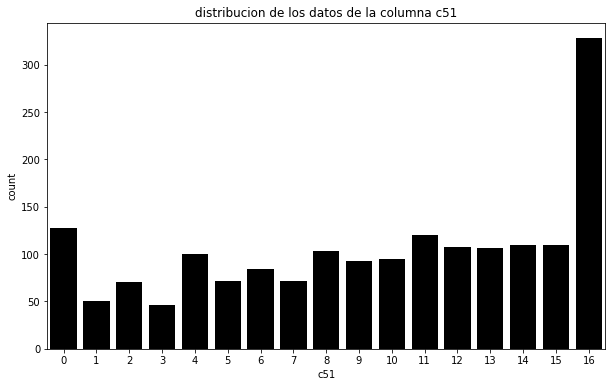

la columna c52 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


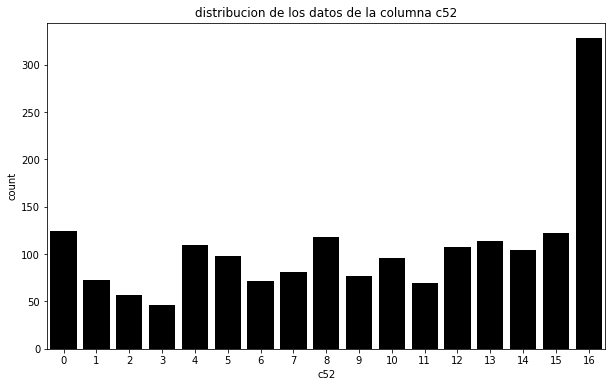

la columna c53 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


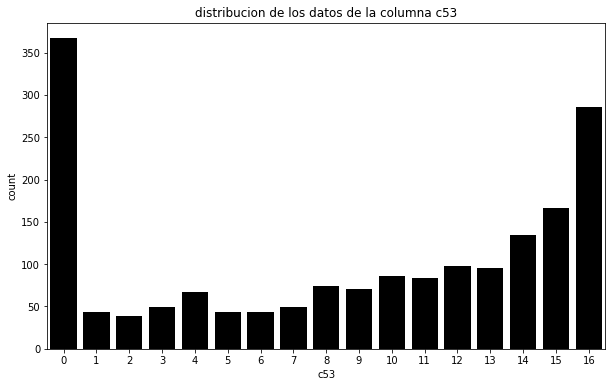

la columna c54 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


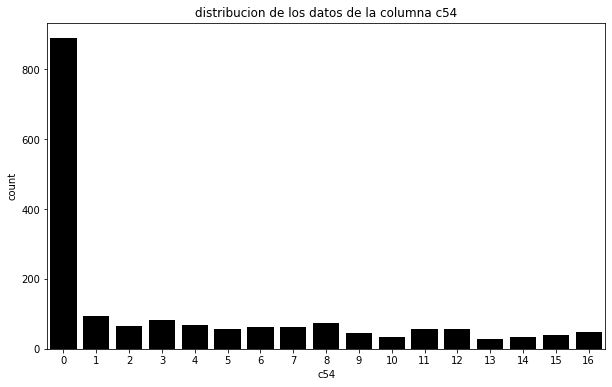

la columna c55 posee 12 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 13]


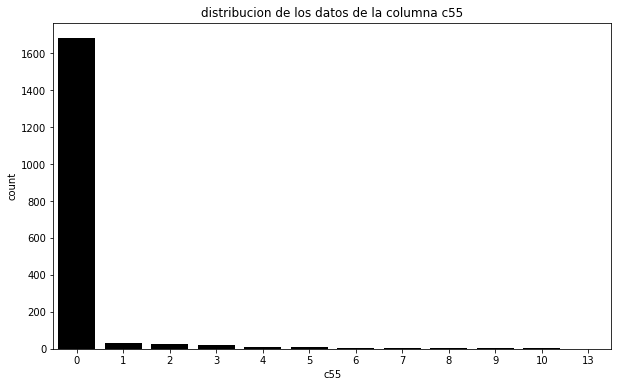

la columna c56 posee 2 diferentes valores enteros, los cuales son:
[0 1]


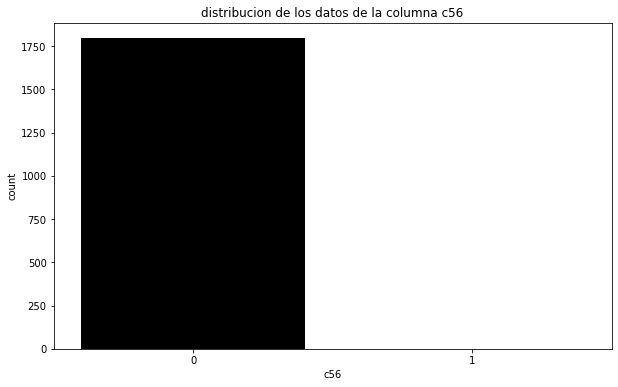

la columna c57 posee 10 diferentes valores enteros, los cuales son:
[0 1 2 3 4 5 6 7 8 9]


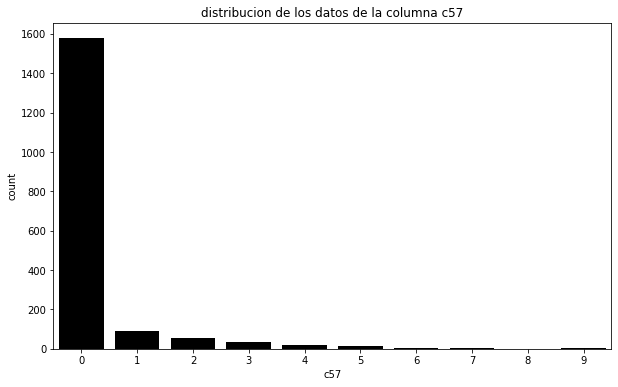

la columna c58 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


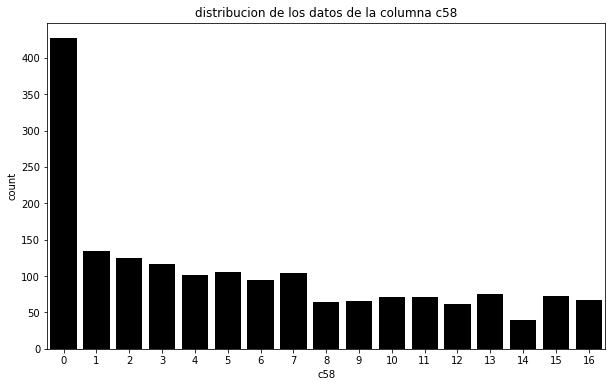

la columna c59 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


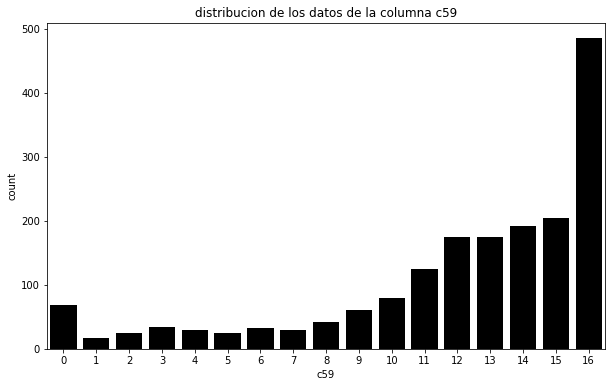

la columna c60 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


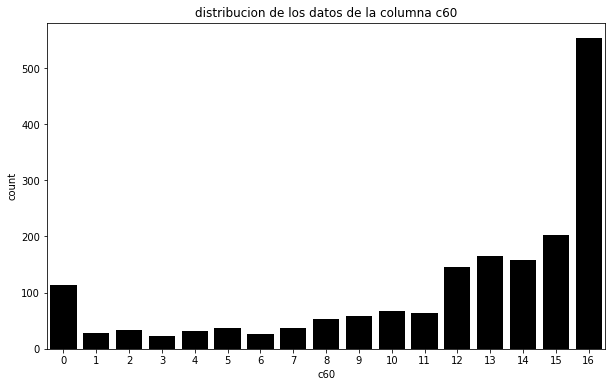

la columna c61 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


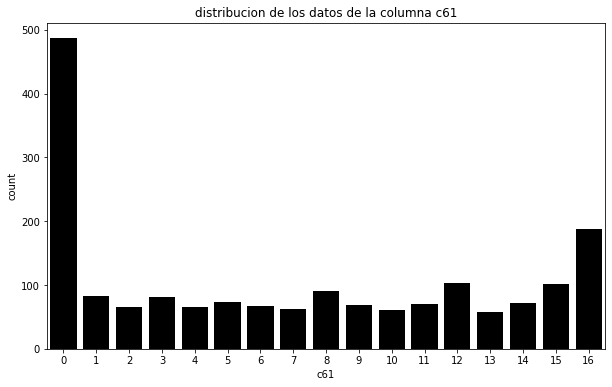

la columna c62 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


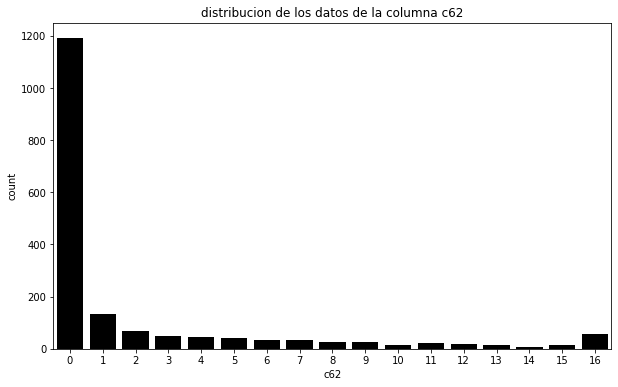

la columna c63 posee 17 diferentes valores enteros, los cuales son:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


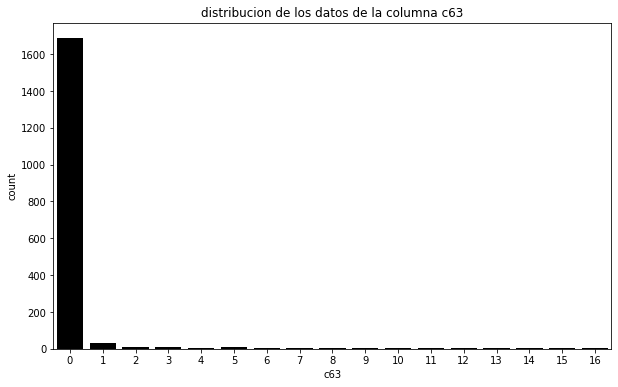

la columna target posee 10 diferentes valores enteros, los cuales son:
[0 1 2 3 4 5 6 7 8 9]


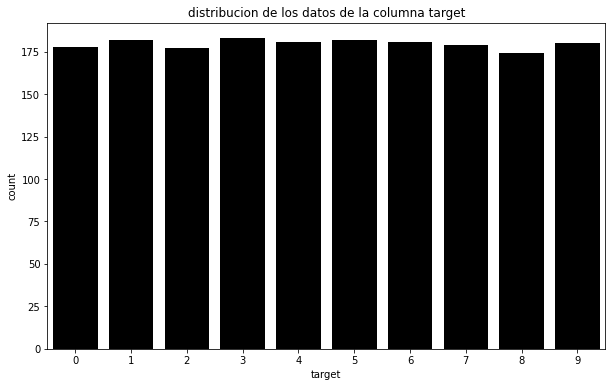

In [11]:
import seaborn as sns 
for i in digits.columns:
  temp= digits[i].unique()
  temp.sort()
  print('la columna', i,'posee', len(temp),'diferentes valores enteros, los cuales son:')
  print(temp)
  plt.figure(figsize=(10,6))
  sns.countplot(x=i, data= digits, color='black')
  plt.title('distribucion de los datos de la columna '+i)
  plt.show()

Gracias a los graficos del conteo de las diferentes clases de cada una de las columnas, se tiene que la mayoria de las columnas tienen mas de 2 clases. Ademas, en la mayoria de las columnas se tiene que una gran mayoria de los datos se concentro en el valor maximo o minimo de esa columna, salvo en la columna target, donde se logra observar que la cantidad de datos en cada una de las clases es muy parecida. Con esto ultimo, podriamos decir que es una base de datos equilibrada.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

In [13]:
digits_dict["images"].shape

(1797, 8, 8)

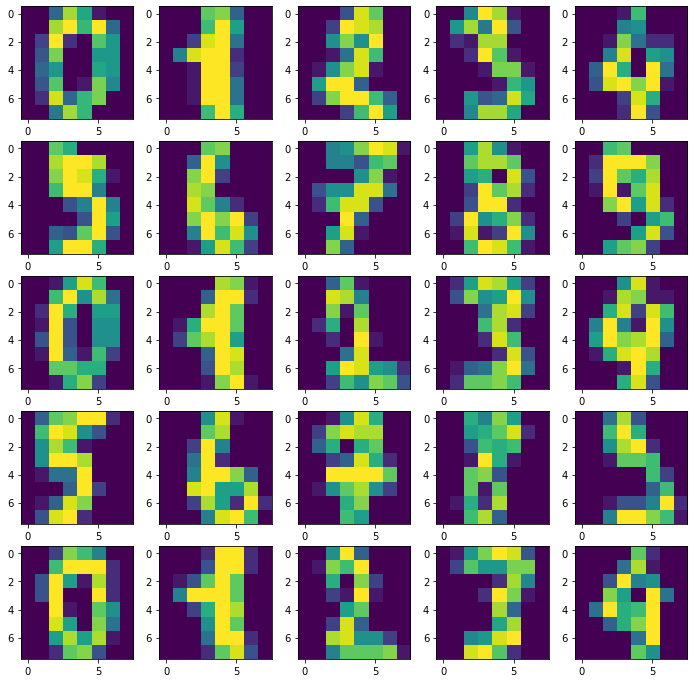

In [14]:
nx, ny = 5,5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
k=0

while k<nx*ny:
  i=0
  while i<nx:
    j=0
    while j<ny:
      axs[i,j].imshow(digits_dict["images"][k])
      j=j+1
      k=k+1
    i=i+1
plt.show()

## FIX ME PLEASE

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [15]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
print("numero de datos de entrenamiento:",X_train.shape[0])
X_train

numero de datos de entrenamiento: 1437


array([[ 0,  0,  5, ...,  0,  0,  0],
       [ 0,  0, 12, ..., 15,  1,  0],
       [ 0,  1, 10, ..., 10,  0,  0],
       ...,
       [ 0,  0,  0, ..., 11,  0,  0],
       [ 0,  0,  9, ...,  9,  1,  0],
       [ 0,  1, 10, ..., 13,  7,  0]])

In [17]:
print("numero de datos de entrenamiento:",X_test.shape[0])
X_test

numero de datos de entrenamiento: 360


array([[ 0,  0, 11, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 13,  0,  0],
       [ 0,  0,  2, ...,  4,  0,  0],
       ...,
       [ 0,  0,  6, ..., 10,  1,  0],
       [ 0,  0,  5, ...,  7,  0,  0],
       [ 0,  1, 14, ...,  0,  0,  0]])

In [18]:
#modelos a usar

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [19]:
log = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# predecir
log_pred = log.predict(X_test)
y_true = y_test

accuracy=accuracy_score(y_test, log_pred)
recall=recall_score(y_test, log_pred,average='weighted')
precision=precision_score(y_test, log_pred,average='weighted' )
fscore=f1_score(y_test, log_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,log_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)


Matriz de confusion:
 
[[38  0  0  0  0  1  0  0  0  0]
 [ 0 28  0  1  0  0  0  0  2  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 39  0  0  1  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  2  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 41  1  0]
 [ 0  1  0  0  0  0  0  0 40  1]
 [ 0  0  0  1  0  1  0  1  1 33]]

Metricas:
 
accuracy:    0.9583333333333334
recall:      0.9583333333333334
precision:   0.9593971225250187
f-score:     0.9582746165961219


In [20]:
from sklearn.model_selection import GridSearchCV

from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time

#hiper-párametros de regresor logistico
std_slc = StandardScaler()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca),('logistic_Reg', log)])

C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
param_log = dict(logistic_Reg__C=C,logistic_Reg__penalty=penalty)

g_log = GridSearchCV(pipe, param_log)
start_time = time.time() #Tiempo de inicio 
g_log.fit(X_train, y_train)

print('Best Penalty:', g_log.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', g_log.best_estimator_.get_params()['logistic_Reg__C'])
print(); print(g_log.best_estimator_.get_params()['logistic_Reg'])
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Penalty: l2
Best C: 2.559547922699533

LogisticRegression(C=2.559547922699533, solver='liblinear')
Este modelo se ajustó en 304.2049329280853 segundos.


In [21]:
best_log = g_log.best_estimator_
best_log.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(best_log.score(X_test, y_test)))

Precisión: 0.958


In [22]:
pred_log= list(best_log.predict(X_test))

accuracy=accuracy_score(y_test, pred_log)
recall=recall_score(y_test, pred_log,average='weighted')
precision=precision_score(y_test, pred_log,average='weighted' )
fscore=f1_score(y_test, pred_log,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,pred_log))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)


Matriz de confusion:
 
[[38  0  0  0  0  1  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  3  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 39  0  0  1  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  2  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 41  1  0]
 [ 0  1  0  0  0  0  0  0 40  1]
 [ 0  0  0  1  0  1  0  1  1 33]]

Metricas:
 
accuracy:    0.9583333333333334
recall:      0.9583333333333334
precision:   0.9596636769582397
f-score:     0.9583573817426456


Se logra ver las metricas de la regresion logistica con los mejores hiperparamatros son muy parecidos a los obtenidos por los hiperparametros por defecto.

In [23]:
#modelo tree
tree = DecisionTreeClassifier().fit(X_train, y_train)

# predecir
tree_pred = tree.predict(X_test)
y_true = y_test

accuracy=accuracy_score(y_test, tree_pred)
recall=recall_score(y_test, tree_pred,average='weighted')
precision=precision_score(y_test, tree_pred,average='weighted' )
fscore=f1_score(y_test, tree_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,tree_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)


Matriz de confusion:
 
[[38  0  0  0  0  0  0  0  1  0]
 [ 0 26  0  1  2  0  0  2  0  0]
 [ 0  0 25  0  0  0  0  0  0  1]
 [ 0  2  1 29  0  1  0  1  1  0]
 [ 0  1  0  0 37  0  0  2  0  0]
 [ 0  0  0  0  0 30  0  0  0  2]
 [ 0  0  0  0  1  0 34  0  0  1]
 [ 0  0  0  1  2  0  0 39  0  0]
 [ 0  3  0  1  0  1  0  3 30  4]
 [ 0  2  0  0  0  4  0  4  1 26]]

Metricas:
 
accuracy:    0.8722222222222222
recall:      0.8722222222222222
precision:   0.877563825403899
f-score:     0.8717241545049644


In [24]:
#hiper-parametros de arbol de clasificacion
rango_criterion = ['gini','entropy']
rango_max_depth =np.array( [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150])
param_tree = dict(criterion=rango_criterion, max_depth=rango_max_depth)
g_tree = GridSearchCV(estimator=tree, 
                  param_grid=param_tree, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
start_time = time.time() #Tiempo de inicio 
g_tree = g_tree.fit(X_train, y_train)
print(g_tree.best_score_)
print(g_tree.best_params_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

0.8573606271777005
{'criterion': 'entropy', 'max_depth': 120}
Este modelo se ajustó en 7.179155349731445 segundos.


In [25]:
best_tree = g_tree.best_estimator_
best_tree.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(best_tree.score(X_test, y_test)))

Precisión: 0.872


In [26]:
pred_tree= list(best_tree.predict(X_test))

accuracy=accuracy_score(y_test, pred_tree)
recall=recall_score(y_test, pred_tree,average='weighted')
precision=precision_score(y_test, pred_tree,average='weighted' )
fscore=f1_score(y_test, pred_tree,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,pred_tree))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)



Matriz de confusion:
 
[[38  0  0  0  0  0  0  1  0  0]
 [ 0 27  0  0  1  0  0  1  1  1]
 [ 0  0 23  1  0  0  1  0  1  0]
 [ 0  0  0 29  0  1  0  2  1  2]
 [ 0  1  1  0 34  0  0  4  0  0]
 [ 0  0  0  1  0 29  0  0  2  0]
 [ 0  0  0  0  0  2 34  0  0  0]
 [ 0  0  0  0  3  0  0 37  1  1]
 [ 0  2  1  2  1  0  1  1 33  1]
 [ 0  0  0  2  2  2  0  1  0 30]]

Metricas:
 
accuracy:    0.8722222222222222
recall:      0.8722222222222222
precision:   0.8738928510954367
f-score:     0.8724040909484381


Se logra ver que las metricas del arbol de decision con los mejor hiperparametros son ligeramente mayor en comparacion a los hiperparametros por defecto.

In [27]:
#MODELO KNN
knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)

# predecir
knn_pred = knn.predict(X_test)
y_true = y_test

accuracy=accuracy_score(y_test, knn_pred)
recall=recall_score(y_test, knn_pred,average='weighted')
precision=precision_score(y_test, knn_pred,average='weighted' )
fscore=f1_score(y_test, knn_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knn_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)


Matriz de confusion:
 
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 25  1  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 39  0  0  1  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  0  0  0  0  1 40  0]
 [ 0  1  0  0  0  0  0  0  0 36]]

Metricas:
 
accuracy:    0.9833333333333333
recall:      0.9833333333333333
precision:   0.9842255892255892
f-score:     0.9834322265096318


In [28]:
dicc_knn = {'n_neighbors' : [1,2,3,4,5, 6, 10, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }

g_knn = GridSearchCV(estimator = knn, param_grid = dicc_knn, cv = 20) 

start_time = time.time() #Tiempo de inicio 

grid_result_knn = g_knn.fit(X_train, y_train)
print("Tuned Hyperparameters :", g_knn.best_params_)
print("Accuracy :",g_knn.best_score_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

Tuned Hyperparameters : {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Accuracy : 0.9874706572769952
Este modelo se ajustó en 30.389476776123047 segundos.


In [29]:
best_knn = g_knn.best_estimator_
best_knn.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(best_knn.score(X_test, y_test)))

Precisión: 0.986


In [30]:
pred_knn= list(best_knn.predict(X_test))

accuracy=accuracy_score(y_test, pred_knn)
recall=recall_score(y_test, pred_knn,average='weighted')
precision=precision_score(y_test, pred_knn,average='weighted' )
fscore=f1_score(y_test, pred_knn,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,pred_knn))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)


Matriz de confusion:
 
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  1  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 39  0  0  1  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  0  0  0  0  0 41  0]
 [ 0  1  0  0  0  0  0  0  0 36]]

Metricas:
 
accuracy:    0.9861111111111112
recall:      0.9861111111111112
precision:   0.987003367003367
f-score:     0.9862408925393686


Se logra ver que las metricas del modelo KNN con los mejores hiperparametros son muy parecido a los hiperparametros por defecto. También, se tiene que el mejor modelo es KNN con los mejores hiperparametros pues sus metricas son mayores en comparacion a los demas modelos.


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [31]:
#Cross validation
from sklearn.model_selection import cross_val_score

best_model= best_knn

scores = cross_val_score(estimator = best_model, X = X_train, y = y_train, cv = 10)

print(scores)
m=scores.mean()
s=scores.std()*2
print('El intervalo de confianza es:\n', m ,"+-",s)

[0.97222222 0.95833333 0.99305556 0.98611111 0.99305556 0.99305556
 0.99305556 1.         0.99300699 0.98601399]
El intervalo de confianza es:
 0.986790986790987 +- 0.023607193420488486


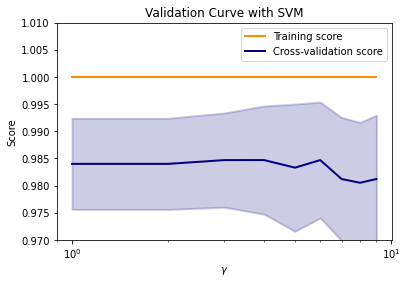

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range (1,10)])
train_scores, test_scores = validation_curve(
    best_model.fit(X_train, y_train),
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.97, 1.01)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [33]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

ry = label_binarize(y, classes=digits["target"].unique())
n_classes = y_test.shape[0]

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, ry,test_size=0.2)
                                                    
classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

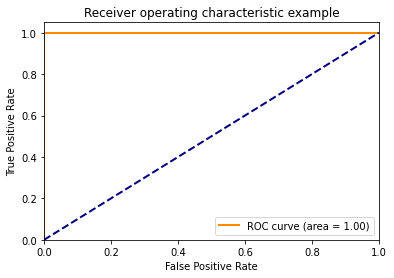

In [34]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una reducción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


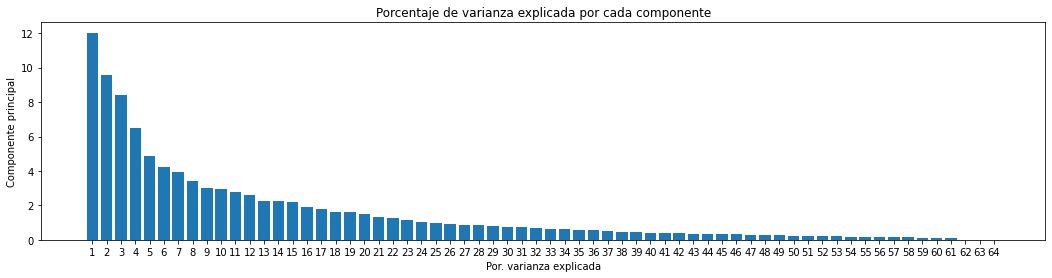

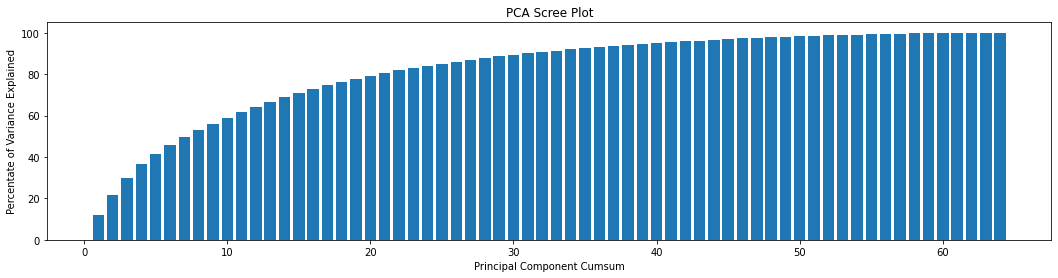

In [35]:
#extraccion de atributos por PCA
#se determina el numero de componenetes para PCA 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

modelo_pca = pca_pipe.named_steps['pca']
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)

plt.figure(figsize=(18,4))
plt.bar(x= range(1,65), height=percent_variance)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(18,4))
plt.bar(x= range(1,65), height=percent_variance_cum)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Se logra ver que con 20 componenetes se explica aproximadamente mas del 80% de la varianza. Entonces, consideraremos 20 componenetes para PCA

In [36]:
new_X1= X.copy()
scale= StandardScaler()
new_X1= scale.fit_transform(new_X1)
pca= PCA(n_components=20)
new_X1= pca.fit_transform(new_X1)
new_X1

array([[ 1.91420866, -0.95451149, -3.94602573, ..., -0.10128559,
         0.4247809 ,  0.42841924],
       [ 0.58898279,  0.92463817,  3.92476356, ..., -0.41952402,
         0.53522936, -0.04360757],
       [ 1.30204218, -0.31718753,  3.02330133, ..., -0.46891876,
        -1.08905568, -1.19716314],
       ...,
       [ 1.02259293, -0.14790292,  2.46997007, ...,  0.69275991,
        -1.60430736,  0.21986981],
       [ 1.07605575, -0.38090486, -2.45548789, ...,  0.80893255,
        -1.79721661,  0.78429139],
       [-1.25769778, -2.2276014 ,  0.28362004, ...,  1.92855723,
        -2.43437792, -1.23078555]])

In [37]:
print("el tamaño de la base de datos antes del PCA es:", X.shape)
print("el tamaño de la base de datos despues del PCA es:", new_X1.shape)


el tamaño de la base de datos antes del PCA es: (1797, 64)
el tamaño de la base de datos despues del PCA es: (1797, 20)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=32)

start_time = time.time() #Tiempo de inicio 
best_knn.fit(x_train, y_train)
print("Sin el PCA este modelo se ejecuto en",(time.time() - start_time),"segundos.") 

pred_knn= list(best_knn.predict(x_test))

accuracy=accuracy_score(y_test, pred_knn)
recall=recall_score(y_test, pred_knn,average='weighted')
precision=precision_score(y_test, pred_knn,average='weighted' )
fscore=f1_score(y_test, pred_knn,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,pred_knn))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)

Sin el PCA este modelo se ejecuto en 0.0014543533325195312 segundos.

Matriz de confusion:
 
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  1  0  0  1  1]
 [ 0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 36]]

Metricas:
 
accuracy:    0.9861111111111112
recall:      0.9861111111111112
precision:   0.9864785838470049
f-score:     0.9860905331622939


In [39]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(new_X1, y,test_size=0.2, random_state=32)

start_time = time.time() #Tiempo de inicio 
best_knn.fit(x_train1, y_train1)
print("Con el PCA este modelo se ejecuto en",(time.time() - start_time),"segundos.") 

pred_knn1= list(best_knn.predict(x_test1))

accuracy=accuracy_score(y_test1, pred_knn1)
recall=recall_score(y_test1, pred_knn1,average='weighted')
precision=precision_score(y_test1, pred_knn1,average='weighted' )
fscore=f1_score(y_test1, pred_knn1,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test1,pred_knn1))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)

Con el PCA este modelo se ejecuto en 0.0010819435119628906 segundos.

Matriz de confusion:
 
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  1  0]
 [ 0  0  0 53  0  1  0  0  2  0]
 [ 0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  1  0  0 33  0  0]
 [ 0  1  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 36]]

Metricas:
 
accuracy:    0.9805555555555555
recall:      0.9805555555555555
precision:   0.9813672239049395
f-score:     0.9806566114203573


Se logra ver que las metricas al no usar y usar PCA son muy parecidas; además, el tiempo de ejecucion con el PCA es ligeramente mayor en comparacion al no usar PCA.

In [40]:
#seleccion de atributos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x_temp=digits.drop(columns="target")
y_temp=digits["target"]
k=20 ##se seleccionan 20 columnas paraconsiderar el mimso numero de componenetes al aplicar PCA
seleccionadas = SelectKBest(f_classif, k=k).fit(x_temp, y_temp)
catrib = seleccionadas.get_support()
columnas= x_temp.columns
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['c02',
 'c10',
 'c13',
 'c20',
 'c21',
 'c26',
 'c28',
 'c30',
 'c33',
 'c34',
 'c36',
 'c38',
 'c42',
 'c43',
 'c44',
 'c46',
 'c54',
 'c58',
 'c60',
 'c61']

In [41]:
new_X2= x_temp[atributos].values
print("el tamaño de la base de datos con seleccion de atributos es:",new_X2.shape)

el tamaño de la base de datos con seleccion de atributos es: (1797, 20)


In [42]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_X2, y,test_size=0.2, random_state=32)

start_time = time.time() #Tiempo de inicio 
best_knn.fit(x_train2, y_train2)
print("Con la seleccion de atributos este modelo se ejecuto en",(time.time() - start_time),"segundos.") 

pred_knn2= list(best_knn.predict(x_test2))

accuracy=accuracy_score(y_test2, pred_knn2)
recall=recall_score(y_test2, pred_knn2,average='weighted')
precision=precision_score(y_test2, pred_knn2,average='weighted' )
fscore=f1_score(y_test2, pred_knn2,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test2,pred_knn2))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy)
print('recall:     ',recall)
print('precision:  ',precision)
print('f-score:    ',fscore)

Con la seleccion de atributos este modelo se ejecuto en 0.0007364749908447266 segundos.

Matriz de confusion:
 
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  1  0]
 [ 0  0  0 54  0  1  0  1  0  0]
 [ 0  0  0  0 30  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 32  1  1]
 [ 0  2  0  0  0  0  0  1 24  0]
 [ 0  0  0  0  0  0  0  0  0 36]]

Metricas:
 
accuracy:    0.9694444444444444
recall:      0.9694444444444444
precision:   0.9699114122798334
f-score:     0.9694736631079205


Se logra observar que el tiempo de ejecucion del modelo al aplicar seleccion de atributos es mayor en comparacion a no aplicarlo, pero disminuye ligeramente los valores de las metricas al aplicar este metodo de reduccion de dimensionalidad.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [43]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    y_pred = np.array(y_pred)

    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

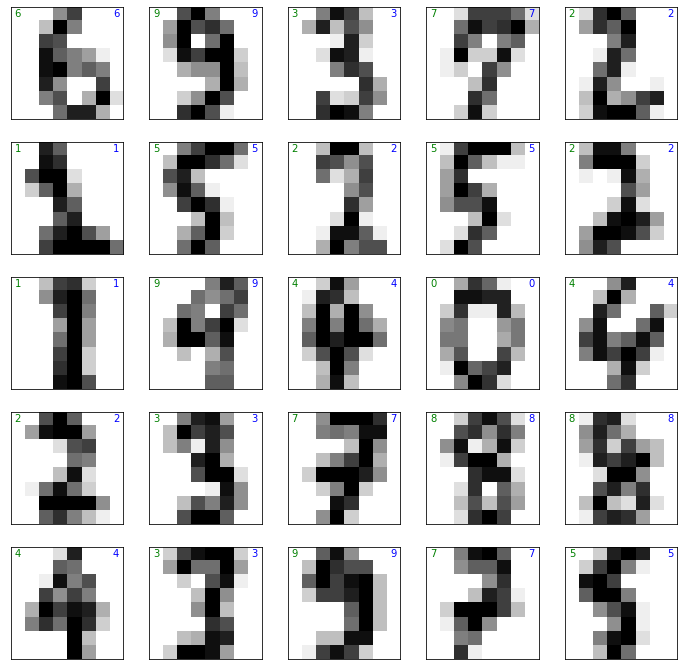

In [44]:
mostar_resultados(digits, best_knn, 5, 5, "correctos")

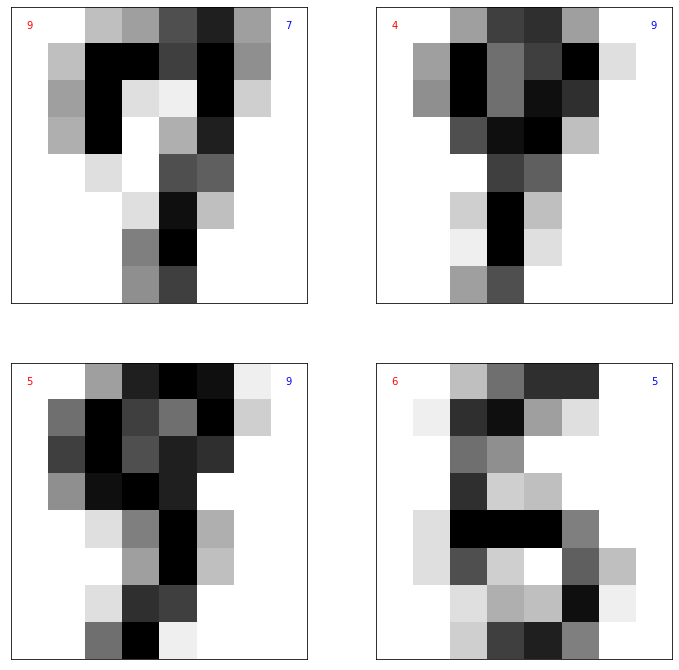

In [45]:
mostar_resultados(digits, best_knn, 2, 2, "incorrectos")

Se logra ver que el modelo se equivoca muy pocas veces en los datos de prueba considerados y estas fallas se pueden deber a la gran similitud que tienen con otors numeros, haciendo que el modelo los identique incorrectamente. Tambien, se puede deber a la presencia de outliers en los datos de entrenamiento.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Se logra ver que el modelo knn con los mejores hiperparametros es el mejor entre los 3 modelos considerados para identificar a que numero corresponde la imagen, pues sus metricas accuracy, precision, recall, f-score son mayores y el numero de predicciones incorrectas en los datos de prueba es muy pequeño. Estos resultados pueden cambiar si se considera otra base de datos, seria conveniente conseguir más datos de entrenamiento para verificar si este modelo sique siendo el mejor entre los metodos considerados y ver si este modelo bueno generalizando con estos nuevos datos.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [46]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Definicion del problema**

A traves de la base de datos anterior, se entrenara un modelo que pueda predecir median_house_value

# **Estadistica Descriptiva**

In [47]:
#tamano de la base de datos

print("la base de datos housing posee", housing.shape[0], "columnas y ", housing.shape[1], "filas.")
print("las columnas de esta base de datos son:")
print(list(housing.columns))

la base de datos housing posee 20640 columnas y  10 filas.
las columnas de esta base de datos son:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [48]:
#tipo de datos de cada columna

col_int= []
col_float= []
col_cat= []

for i in housing.columns:
  if housing[i].dtypes== int:
    col_int.append(i)
  elif housing[i].dtypes== float:
    col_float.append(i)
  elif housing[i].dtypes== object:
    col_cat.append(i)

print("la base de datos housing posee ", len(col_int), "columnas con valores enteros, ",
      len(col_float), "columnas con valores flotantes y ",len(col_cat), "columnas con valores categoricas")
print("las columnas con valores enteros son:")
print(col_int)
print("las columnas con valores flotantes son:")
print(col_float)
print("las columnas con valores categoricos son:")
print(col_cat)


la base de datos housing posee  0 columnas con valores enteros,  9 columnas con valores flotantes y  1 columnas con valores categoricas
las columnas con valores enteros son:
[]
las columnas con valores flotantes son:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
las columnas con valores categoricos son:
['ocean_proximity']


In [49]:
#resumen estadistico de las columnas de housing
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [50]:
#identificacion de los diferentes elementos en cada columna

for i in housing.columns:
  temp= housing[i].unique()
  print("la columna ", i," posee ", len(temp),"diferentes elementos, los cuales son:")
  print(temp)

la columna  longitude  posee  844 diferentes elementos, los cuales son:
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46

In [51]:
#cantidad de datos nulos en cada columna
null= housing.isnull().sum()
print(null)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Se logra ver que solo hay datos nulos en la columna total_bedrooms. Por lo tanto reemplazaremos los datos nulos en esta columna por la media de los datos de esta columna despues de la visualizacion descriptiva.

# **Visualizacion descriptiva**

Veremos la distribucion de los datos de cada columna, comenzando con la columna con los valores a predecir.

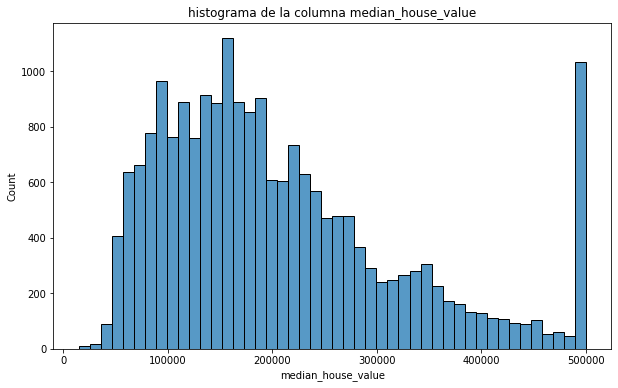

In [52]:
#distribucion de la columna a predecir
target= "median_house_value"
plt.figure(figsize=(10,6))
sns.histplot(housing[target])
plt.title("histograma de la columna median_house_value")
plt.show()

Se logra ver que los datos de la columna median_house_value tiene una distribucion parecida a la normal y la mayoria de los datos se concentra alrededor de 150.000 aproximadamente.

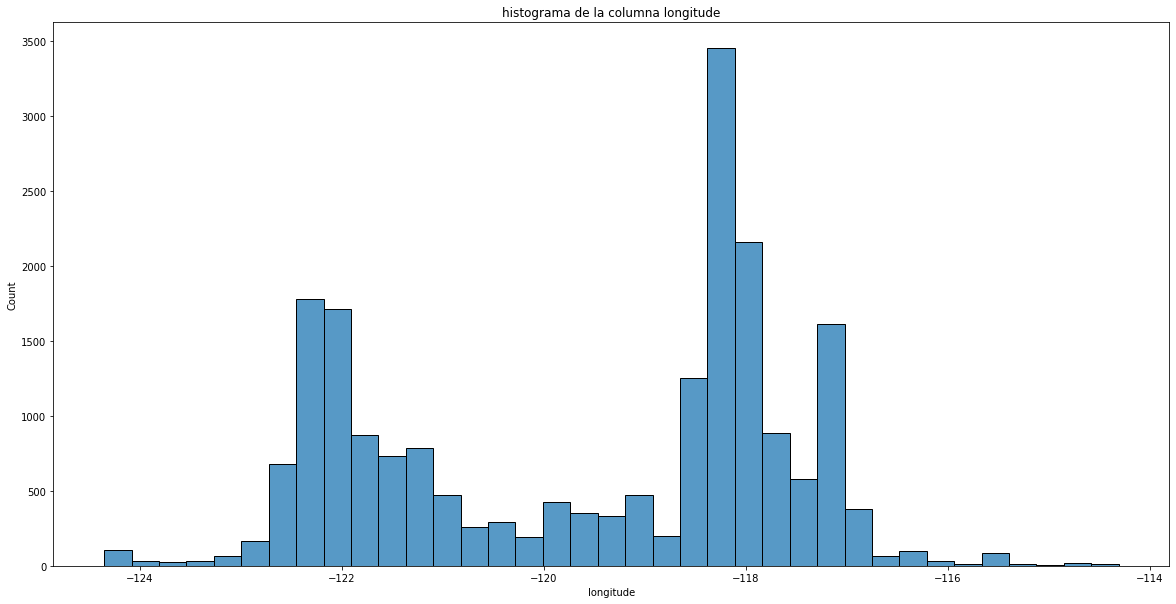

In [53]:
plt.figure(figsize=(20,10))
sns.histplot(housing["longitude"])
plt.title("histograma de la columna longitude")
plt.show()

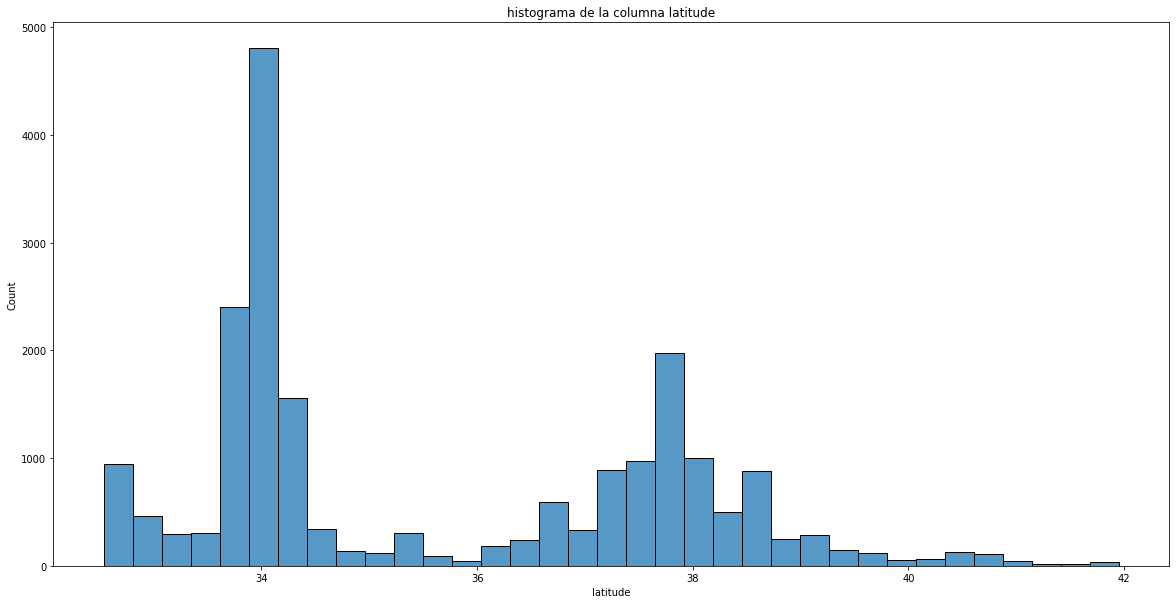

In [54]:
plt.figure(figsize=(20,10))
sns.histplot(housing["latitude"])
plt.title("histograma de la columna latitude")
plt.show()

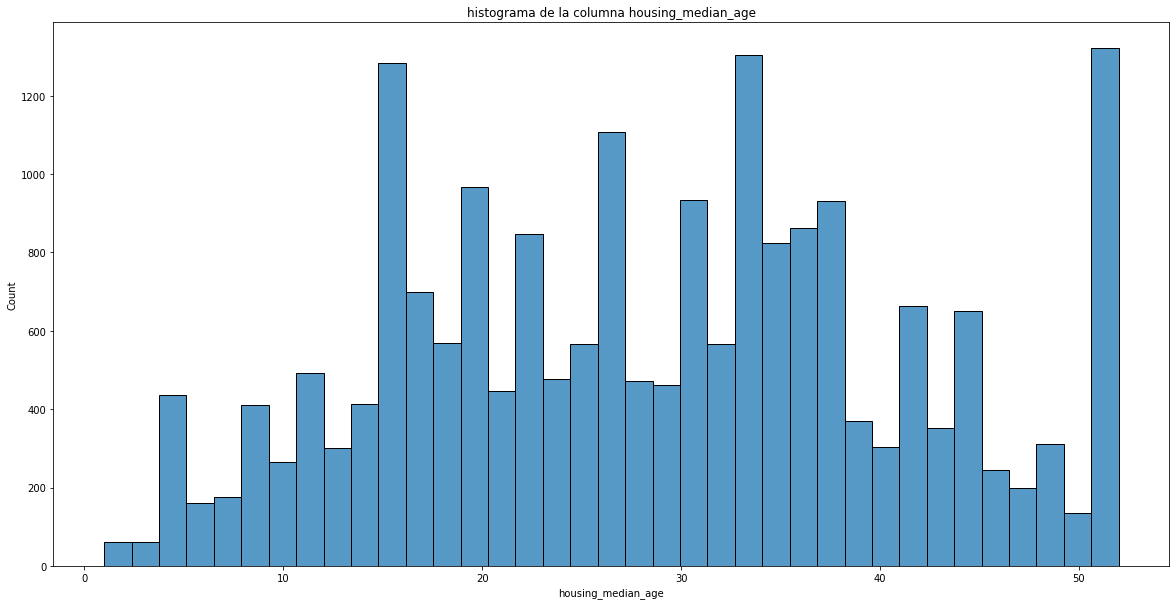

In [55]:
plt.figure(figsize=(20,10))
sns.histplot(housing["housing_median_age"])
plt.title("histograma de la columna housing_median_age")
plt.show()

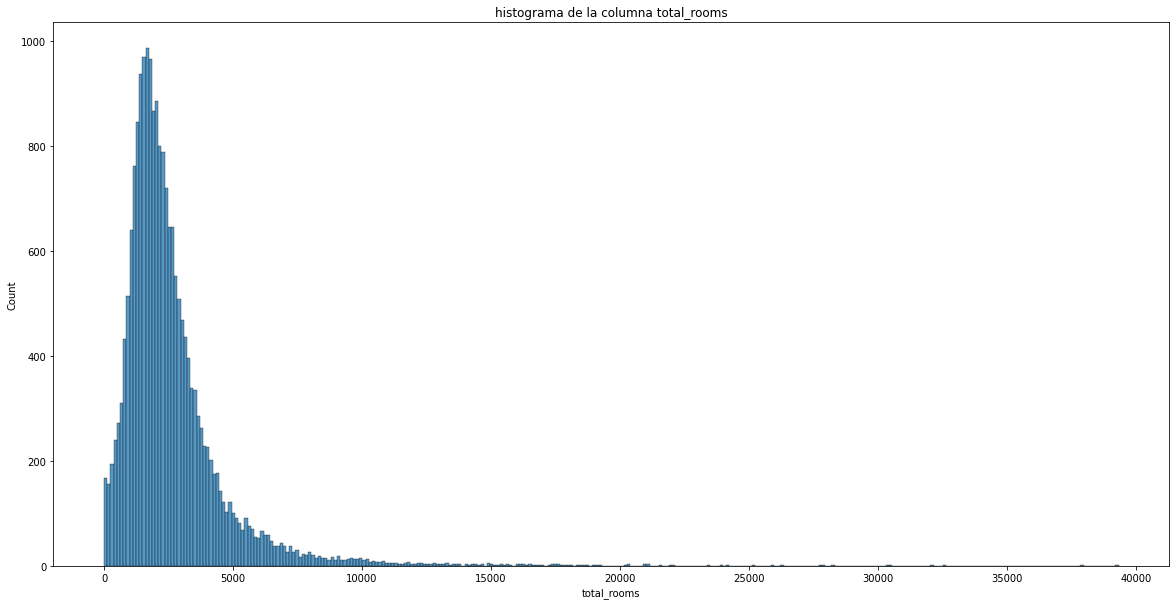

In [56]:
plt.figure(figsize=(20,10))
sns.histplot(housing["total_rooms"])
plt.title("histograma de la columna total_rooms")
plt.show()

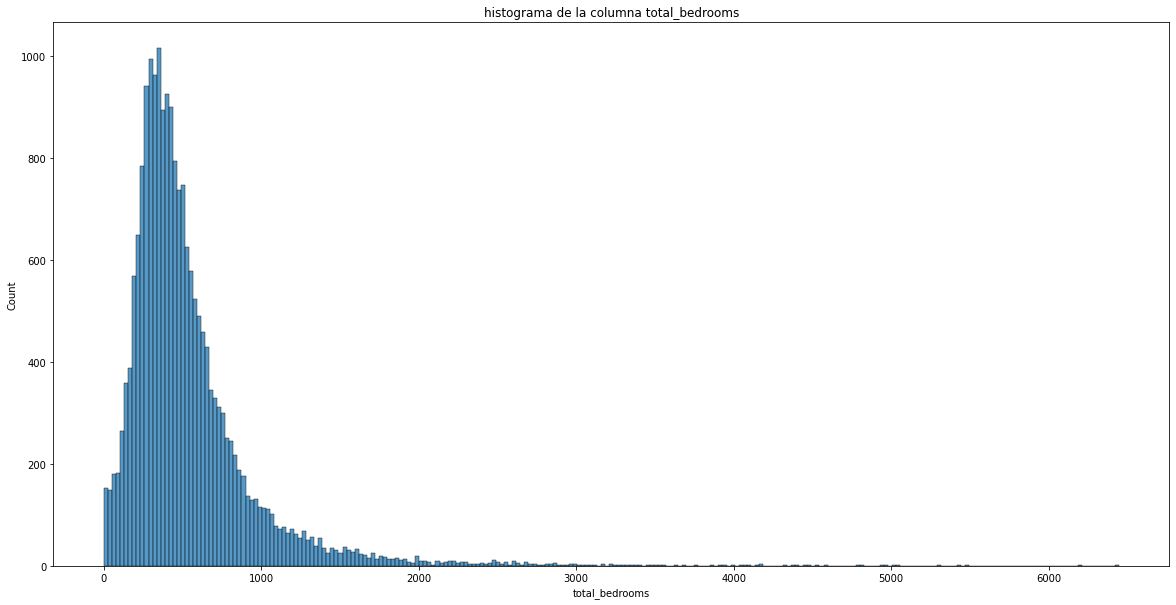

In [57]:
plt.figure(figsize=(20,10))
sns.histplot(housing["total_bedrooms"])
plt.title("histograma de la columna total_bedrooms")
plt.show()

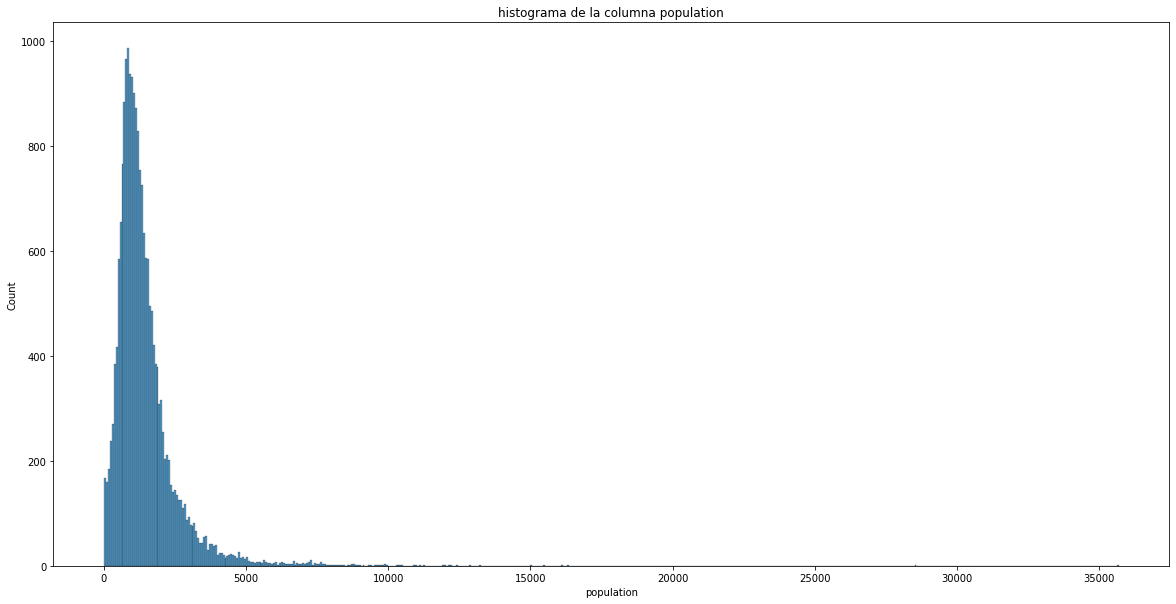

In [58]:
plt.figure(figsize=(20,10))
sns.histplot(housing["population"])
plt.title("histograma de la columna population")
plt.show()

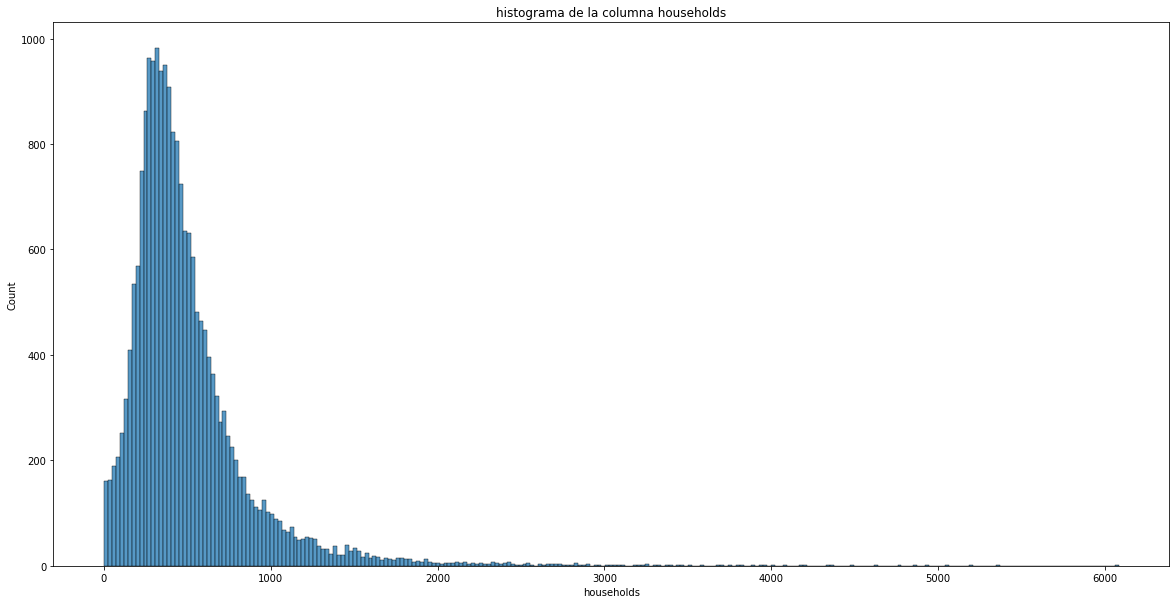

In [59]:
plt.figure(figsize=(20,10))
sns.histplot(housing["households"])
plt.title("histograma de la columna households")
plt.show()

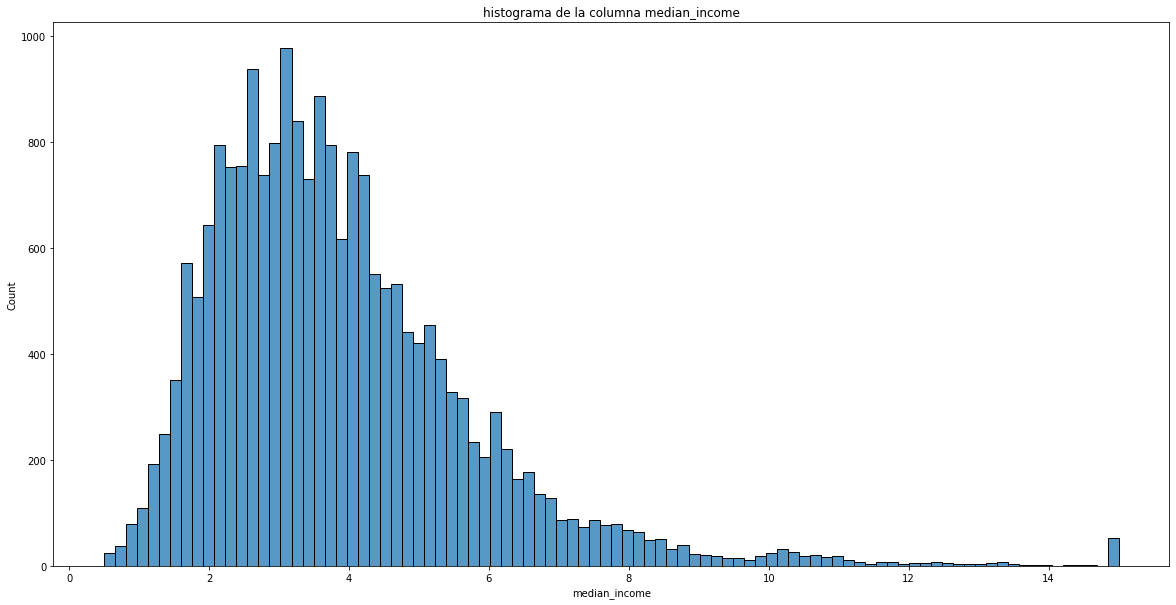

In [60]:
plt.figure(figsize=(20,10))
sns.histplot(housing["median_income"])
plt.title("histograma de la columna median_income")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


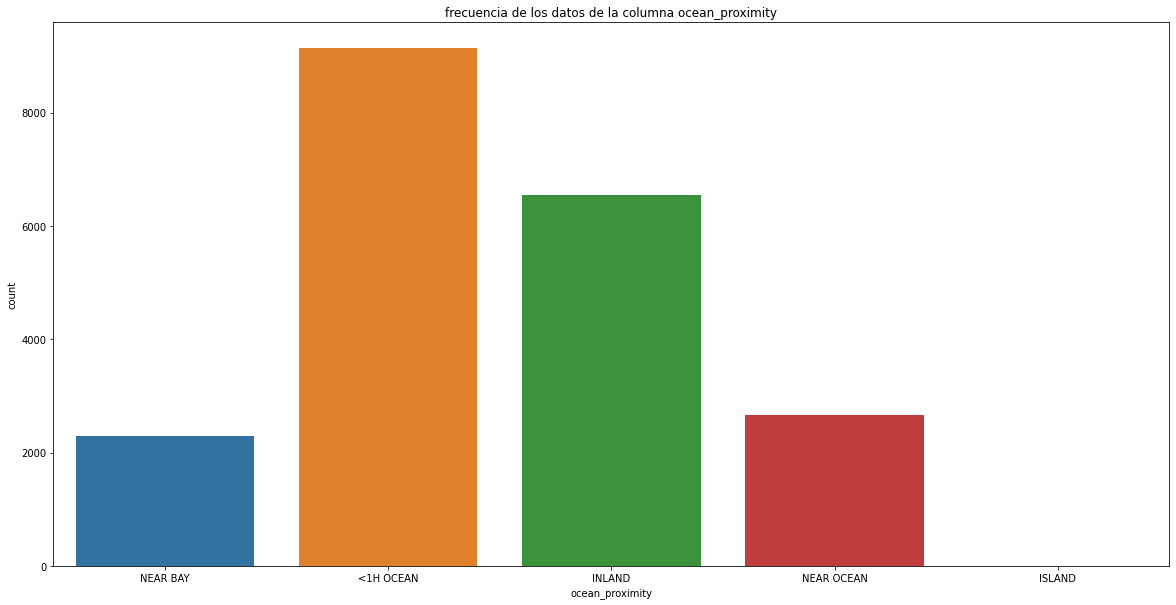

In [61]:
plt.figure(figsize=(20,10))
sns.countplot(housing["ocean_proximity"])
plt.title("frecuencia de los datos de la columna ocean_proximity")
plt.show()

Se logra ver que las columnas latitude, longitude y housing_median_age no siguen una distribucion normal, mientras que el resto d ecolumnas con valores numericos si la presnetan y tienen sesgo positivo.

Por último, se logra ver que hay una gran cantidad de datos que estan mas de 1 hora del ocenao y hay muy pocos datos de casas en islas.

# **Preprocesamiento**

Como se vio antes, en la columna total_bedrooms hay datos nulos. Entonces, imputaremos estos datos con la media. Luego, aplicaremos getdummies a la columna ocean_proximity para que la base de datos solo tenga columnas con valores numericos y se normalizara los datos para que las diferentes escalas no afecten en los modelos a usar

In [62]:
from sklearn.preprocessing import StandardScaler

housing_copy= housing.copy()
housing_copy["total_bedrooms"]= housing_copy["total_bedrooms"].fillna(housing_copy["total_bedrooms"].mean())
housing_copy= pd.get_dummies(housing_copy, prefix= col_cat)
y_house= housing_copy['median_house_value']
x_house= housing_copy.drop(columns=['median_house_value'])

scaler= StandardScaler()
x_norm= scaler.fit_transform(x_house)
x_norm

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

# **Modelos y Métricas**

In [63]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

tree_house= DecisionTreeRegressor(random_state= 99)
knn_house= neighbors.KNeighborsClassifier()
reg_lin_house= linear_model.LinearRegression()
bay_house= linear_model.BayesianRidge()

In [64]:
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    return df_result

In [66]:
rango_criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
rango_max_depth =np.array( [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150])
param_tree = dict(criterion=rango_criterion, max_depth=rango_max_depth)
g_tree_house = GridSearchCV(estimator=tree_house, 
                  param_grid=param_tree, 
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

g_tree_house.fit(x_norm, y_house)
print(g_tree_house.best_score_)
print(g_tree_house.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.02209302 0.02209302 0.02209302 0.02209302 0.02209302 0.02209302
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.02209302 0.02209302 0.02209302 0.02209302 0.02209302 0.02209302
 0.02068798 0.02165698 0.02180233        nan        nan        nan
        nan        nan        nan        nan 0.02325581 0.02243217
 0.02204457 0.02204457 0.02204457 0.02204457 0.02204457 0.02204457
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


0.023255813953488372
{'criterion': 'absolute_error', 'max_depth': 20}


In [67]:
best_tree_house = g_tree_house.best_estimator_
best_tree_house.fit(x_norm, y_house)
temp_tree= pd.DataFrame()
temp_tree['y']= y_house
temp_tree['yhat']= best_tree_house.predict(x_norm)
print(summary_metrics(temp_tree))

        mae           mse        rmse   mape  maape   wmape  mmape   smape
0  4435.751  2.455502e+08  15670.0404  0.024  0.023  0.0214  0.024  0.0235


In [68]:
dicc_knn = {'n_neighbors' : [1,2,3,4,5, 6, 10, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }

g_knn_house = GridSearchCV(estimator = knn_house, param_grid = dicc_knn, cv = 3) 

g_knn_house.fit(x_norm, y_house)
print("Tuned Hyperparameters :", g_knn_house.best_params_)
print("Accuracy :",g_knn_house.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Tuned Hyperparameters : {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'}
Accuracy : 0.03294573643410853


In [69]:
best_knn_house = g_knn_house.best_estimator_
best_knn_house.fit(x_norm, y_house)
temp_knn= pd.DataFrame()
temp_knn['y']= y_house
temp_knn['yhat']= best_knn_house.predict(x_norm)
print(summary_metrics(temp_knn))

          mae           mse       rmse    mape   maape   wmape   mmape   smape
0  68990.7043  9.904522e+09  99521.466  0.3347  0.2981  0.3335  0.3347  0.3733


In [70]:
parameters_linear = {'fit_intercept':[True,False], 'positive':[True, False]}
g_linear_house = GridSearchCV(reg_lin_house, parameters_linear, cv=3)
g_linear_house.fit(x_norm, y_house)
print("Tuned Hyperparameters :", g_linear_house.best_params_)
print("Accuracy :",g_linear_house.best_score_)

Tuned Hyperparameters : {'fit_intercept': False, 'positive': False}
Accuracy : -14744.103991681752


In [71]:
best_linear_house = g_linear_house.best_estimator_
best_linear_house.fit(x_norm, y_house)
temp_linear= pd.DataFrame()
temp_linear['y']= y_house
temp_linear['yhat']= best_linear_house.predict(x_norm)
print(summary_metrics(temp_linear))

           mae           mse         rmse    mape   maape   wmape   mmape  \
0  206990.6255  4.751001e+10  217967.9121  1.2751  0.8293  1.0007  1.2751   

   smape  
0  1.649  


In [72]:
bay_params = {'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
g_bay_house = GridSearchCV(bay_house, bay_params, cv=3)
g_bay_house.fit(x_norm, y_house)
print("Tuned Hyperparameters :", g_bay_house.best_params_)
print("Accuracy :",g_bay_house.best_score_)

Tuned Hyperparameters : {'alpha_init': 1.9, 'lambda_init': 0.01}
Accuracy : 0.5781960519800727


In [73]:
best_bay_house = g_bay_house.best_estimator_
best_bay_house.fit(x_norm, y_house)
temp_bay= pd.DataFrame()
temp_bay['y']= y_house
temp_bay['yhat']= best_bay_house.predict(x_norm)
print(summary_metrics(temp_bay))

          mae           mse        rmse   mape   maape   wmape  mmape   smape
0  49818.3924  4.720689e+09  68707.2717  0.287  0.2574  0.2408  0.287  0.2632


# **Analisis de resultados**

En los resultado obtenidos, se logra observar que el mejor modelo entre los 4 considerados es el regresor de arbol de decisión con los hiperparametros 'criterion': 'absolute_error' y 'max_depth': 20 pues posee los menores valores en todas las metricas entre todos los modelos y el peor modelo en este caso fue la regresion lineal.

# **Visualizaciones del resultado**

In [74]:
best_model= DecisionTreeRegressor(criterion= "absolute_error", max_depth= 20,random_state= 99)
best_model.fit(x_norm, y_house)
predict= pd.DataFrame({'predict': best_model.predict(x_norm), 'y_true': y_house,
                       'diference':y_house - best_model.predict(x_norm)})
predict.head(30)

,predict,y_true,diference
0,452600.0,452600.0,0.0
1,358500.0,358500.0,0.0
2,352100.0,352100.0,0.0
3,341300.0,341300.0,0.0
4,342200.0,342200.0,0.0
5,269700.0,269700.0,0.0
6,299200.0,299200.0,0.0
7,241800.0,241400.0,-400.0
8,226700.0,226700.0,0.0
9,261100.0,261100.0,0.0


# **Conclusiones**

Al ver las predicciones del mejor modelo entre los considerados, se logra observar que la diferencia de sus predicciones son relativamente grande en la mayoria de los casos y son muy pocas. Tambien, se logra observar que el precio devuelto por este modelo son enteros en la mayoria d elos casos. Podriamos ver el efecto de PCA o seleccion de atributos en el efecto de las predicciones de estos modelos, que no se considero realizar por cuestión de tiempo y por el tamaño relativamente pequeño de caracteristicas a trabajar en los modelos. 

Se logra observra que la regresion lineal no fue un buen modelo para esta base de datos, lo cual implica que tal vez no exista una fuerta correlacion lineal entre las caracteristicas y el precio promedio de las cas. Esta afirmacion se puede verificar si vemos el valores absoluto de estas variables con el valor a predecir.